In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import random

In [ ]:
datasets_path = '/home/ubuntu/thesis/data/datasets'

Mounted at /content/drive/


# Datasets

## --TSB-AD
https://github.com/TheDatumOrg/TSB-AD

The "U" and "M" datasets are respectively uni and multi-variate.

In [ ]:
data_direc = datasets_path + '/TSB-AD/TSB-AD-U/001_NAB_id_1_Facility_tr_1007_1st_2014.csv'
df = pd.read_csv(data_direc).dropna()

In [ ]:
df = df.tail(100)

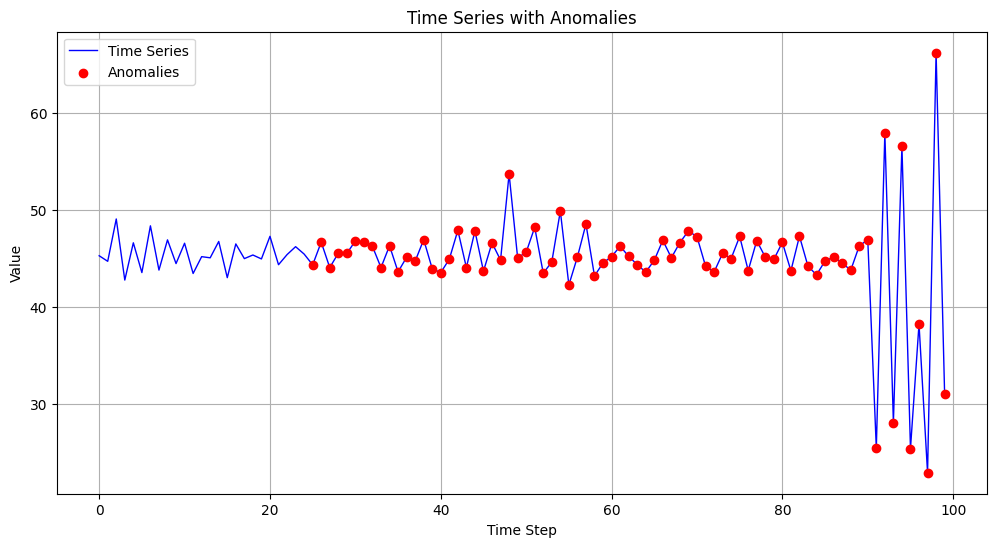

In [ ]:
import pandas as pd

df['Index'] = range(len(df))  # Create an index if the data has no explicit time column

plt.figure(figsize=(12, 6))
plt.plot(df['Index'], df['Data'], label="Time Series", color="blue", linewidth=1)

# Highlight anomalies
anomalies = df[df['Label'] == 1]
plt.scatter(anomalies['Index'], anomalies['Data'], color="red", label="Anomalies", zorder=3)

plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("Time Series with Anomalies")
plt.legend()
plt.grid(True)

plt.show()


## --UCR Time Series Classification Archive
https://www.cs.ucr.edu/%7Eeamonn/time_series_data_2018/

In [ ]:
df = pd.read_csv(datasets_path + '/UCRArchive_2018/Adiac/Adiac_TEST.tsv', sep='\t', header=None)

summary_df = pd.read_csv(datasets_path + '/UCRArchive_2018/DataSummary.csv')

In [ ]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,167,168,169,170,171,172,173,174,175,176
0,16,1.374884,1.289439,1.204305,1.119371,1.034655,0.950345,0.866026,0.782281,0.699228,...,1.400060,1.484320,1.568642,1.646263,1.679992,1.692588,1.659063,1.610398,1.539240,1.451924
1,36,1.339994,1.235318,1.132038,1.030512,0.932154,0.835024,0.741824,0.650086,0.560030,...,1.569755,1.663806,1.726919,1.741076,1.757818,1.769758,1.721996,1.657216,1.548096,1.441362


In [ ]:
summary_df.head(2)

,ID,Type,Name,Train,Test,Class,Length,ED (w=0),DTW (learned_w),DTW (w=100),Default rate,Data donor/editor
0,1,Image,Adiac,390,391,37,176,0.3887,0.3913 (3),0.3964,0.9591,A. Jalba
1,2,Image,ArrowHead,36,175,3,251,0.2000,0.2000 (0),0.2971,0.6057,L. Ye & E. Keogh


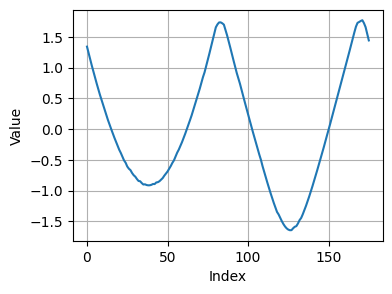

In [ ]:
row_idx = 1
row_data = df.iloc[row_idx, 1:]

plt.figure(figsize=(4, 3))
plt.plot(range(len(row_data)), row_data)
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("")
plt.grid(True)
plt.show()

## --M4 Competition Dataset
https://github.com/Mcompetitions/M4-methods

In [ ]:
df = pd.read_csv(datasets_path + '/M4 Competition/Train/Hourly-train.csv')

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V952,V953,V954,V955,V956,V957,V958,V959,V960,V961
0,H1,605.0,586.0,586.0,559.0,511.0,443.0,422.0,395.0,382.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,H2,3124.0,2990.0,2862.0,2809.0,2544.0,2201.0,1996.0,1861.0,1735.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H3,1828.0,1806.0,1897.0,1750.0,1679.0,1620.0,1463.0,1342.0,1192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H4,6454.0,6324.0,6075.0,5949.0,5858.0,5579.0,5163.0,4790.0,4478.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H5,4263.0,4297.0,4236.0,4080.0,3883.0,3672.0,3248.0,2841.0,2513.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
info_df = pd.read_csv(datasets_path +'/M4 Competition/M4-info.csv')

In [ ]:
info_df.where(info_df['M4id'] == 'H1').dropna()

,M4id,category,Frequency,Horizon,SP,StartingDate
99586,H1,Other,24.0,48.0,Hourly,01-07-15 12:00


No context data?

## --ETT
https://github.com/zhouhaoyi/ETDataset

In [ ]:
df = pd.read_csv(datasets_path + '/ETT/ETTm1.csv')

In [ ]:
df.head(2)

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 00:15:00,5.760,2.076,1.492,0.426,4.264,1.401,30.459999


## RR interval time series from healthy subjects
https://physionet.org/content/rr-interval-healthy-subjects/1.0.0/

In [ ]:
patient_info = pd.read_csv(datasets_path + '/RR interval time series from healthy subjects/patient-info.csv')

In [ ]:
patient_info.head(2)

,File,Age (years),Gender
0,0,53.0,M
1,2,17.0,F


In [ ]:
patient_info[patient_info['File'] == int(2)]['Age (years)'].values[0]

17.0

In [ ]:
rr_interval_path = datasets_path + '/RR interval time series from healthy subjects'

rr_intervals = {}

# Loop through the files
for filename in os.listdir(rr_interval_path):
  if filename.endswith(".txt"):
    patient_id = filename.split(".")[0].lstrip('0')

    rr_intervals[patient_id] = {}

    filepath = os.path.join(rr_interval_path, filename)

    # Read the file line by line, converting each line to a float
    try:
        with open(filepath, 'r') as f:
            lines = f.readlines()
            file_list = [float(line.strip()) for line in lines if line.strip()] #convert to float and remove empty strings

    except Exception as e:
        print(f"Error reading {filename}: {e}")
        continue

    rr_intervals[patient_id]['data'] = file_list
    rr_intervals[patient_id]['metadata'] = {}
    rr_intervals[patient_id]['metadata']['series length'] = len(file_list)
    try:
      rr_intervals[patient_id]['metadata']['age'] = patient_info[patient_info['File'] == int(patient_id)]['Age (years)'].values[0]
    except:
      print("Patient ", patient_id, "has no age information.")
      rr_intervals[patient_id]['metadata']['age'] = None
    try:
      rr_intervals[patient_id]['metadata']['gender'] = patient_info[patient_info['File'] == int(patient_id)]['Gender'].values[0]
    except:
      print("Patient ", patient_id, "has no gender information.")
      rr_intervals[patient_id]['metadata']['gender'] = None

    rr_intervals[patient_id]['metadata']['mean'] = sum(file_list) / len(file_list)
    rr_intervals[patient_id]['metadata']['min'] = min(file_list)
    rr_intervals[patient_id]['metadata']['max'] = max(file_list)
    rr_intervals[patient_id]['metadata']['std'] = pd.Series(file_list).std()

    rr_intervals[patient_id]['metadata']['frequency'] = "None"

    #Print the length of the file
    print(f"File: {filename}, Length: {len(file_list)}")

print("Done.")

File: 4107.txt, Length: 115052
File: 4088.txt, Length: 154807
File: 4097.txt, Length: 186578
File: 407.txt, Length: 137094
File: 4099.txt, Length: 181660
File: 4061.txt, Length: 194453
File: 4062.txt, Length: 184435
File: 010.txt, Length: 82080
File: 411.txt, Length: 120826
File: 4069.txt, Length: 76081
Patient  4078 has no age information.
Patient  4078 has no gender information.
File: 4078.txt, Length: 185138
File: 005.txt, Length: 97925
File: 4054.txt, Length: 153536
File: 003.txt, Length: 108150
File: 007.txt, Length: 57333
File: 422.txt, Length: 94940
File: 412.txt, Length: 120265
File: 4016.txt, Length: 226787
File: 4022.txt, Length: 177766
File: 002.txt, Length: 68029
File: 4091.txt, Length: 164476
File: 4120.txt, Length: 157387
File: 4059.txt, Length: 190081
File: 4116.txt, Length: 100936
File: 4021.txt, Length: 170656
File: 4041.txt, Length: 206942
File: 4018.txt, Length: 190805
File: 4117.txt, Length: 117269
File: 405.txt, Length: 129843
File: 402.txt, Length: 89743
File: 407

In [ ]:
def plot_1d(id, data_dict, column=None, max_len=None): # id is a key in data_dict, and data_dict contains all the data
  id = str(id)

  if id in data_dict and 'data' in data_dict[id]:
    plt.figure(figsize=(7, 3))

    if column is not None:
      plt.plot(data_dict[id]['data'][column][:max_len])
    else:
      plt.plot(data_dict[id]['data'][:max_len])

    #plt.xlabel("Time Step")
    #plt.ylabel("RR Interval")

    plt.title({k: v for k, v in data_dict[id].items() if k != 'data'})
    plt.grid(True)
    plt.show()
  else:
    print(f"Data for subject {id} not found or is incomplete.")

  print(f"total series length: {data_dict[id]['metadata']['series length']}")

In [ ]:
rr_intervals.keys()

dict_keys(['4107', '4088', '4097', '407', '4099', '4061', '4062', '10', '411', '4069', '4078', '5', '4054', '3', '7', '422', '412', '4016', '4022', '2', '4091', '4120', '4059', '4116', '4021', '4041', '4018', '4117', '405', '402', '4075', '4060', '4098', '4033', '4082', '', '4083', '4013', '421', '4102', '4002', '4115', '4068', '4057', '427', '4035', '4032', '4074', '4017', '4003', '8', '4029', '419', '410', '6', '4056', '4081', '4092', '4084', '4067', '4101', '4079', '4050', '4110', '4008', '4085', '4089', '9', '404', '4014', '4023', '4100', '4086', '4072', '424', '4020', '408', '4005', '4024', '406', '4034', '4031', '4010', '4076', '4038', '4096', '4025', '4090', '4000', '4087', '4036', '4114', '4065', '4015', '4070', '4046', '4077', '4037', '4006', '4007', '4119', '13', '4030', '4118', '4012', '4112', '4064', '4106', '425', '4047', '4040', '4028', '4113', '4055', '416', '4019', '418', '4049', '11', '4052', '4066', '4044', '4027', '4111', '4108', '413', '409', '420', '4043', '4071', 

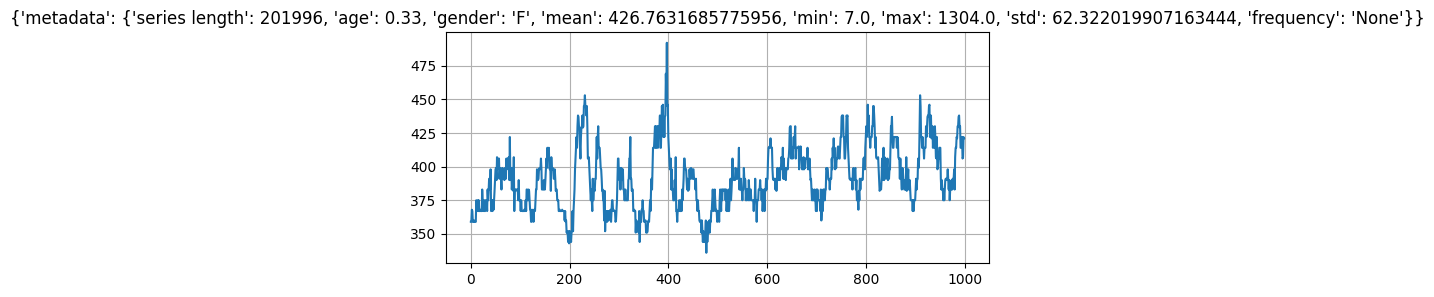

total series length: 201996


In [ ]:
plot_1d(id=4070, data_dict=rr_intervals, max_len=1000)

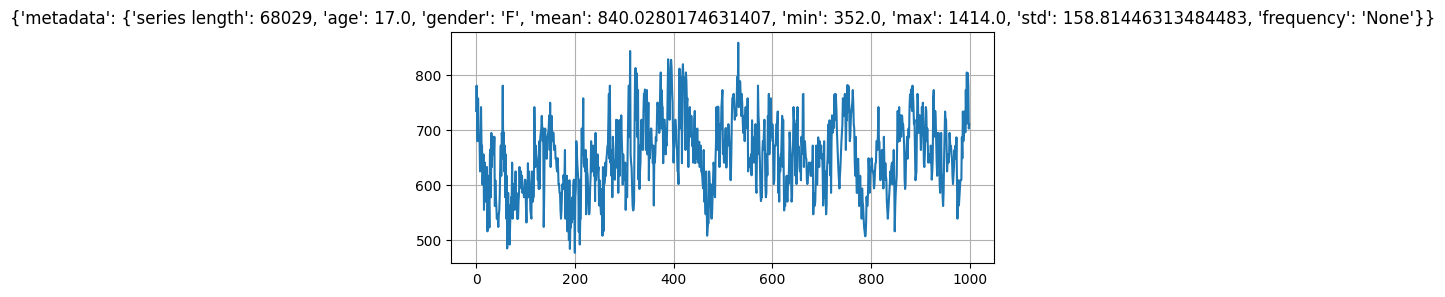

total series length: 68029


In [ ]:
plot_1d(id=2, data_dict=rr_intervals, max_len=1000)

In [ ]:
rr_intervals.keys()

dict_keys(['4107', '4088', '4097', '407', '4099', '4061', '4062', '10', '411', '4069', '4078', '5', '4054', '3', '7', '422', '412', '4016', '4022', '2', '4091', '4120', '4059', '4116', '4021', '4041', '4018', '4117', '405', '402', '4075', '4060', '4098', '4033', '4082', '', '4083', '4013', '421', '4102', '4002', '4115', '4068', '4057', '427', '4035', '4032', '4074', '4017', '4003', '8', '4029', '419', '410', '6', '4056', '4081', '4092', '4084', '4067', '4101', '4079', '4050', '4110', '4008', '4085', '4089', '9', '404', '4014', '4023', '4100', '4086', '4072', '424', '4020', '408', '4005', '4024', '406', '4034', '4031', '4010', '4076', '4038', '4096', '4025', '4090', '4000', '4087', '4036', '4114', '4065', '4015', '4070', '4046', '4077', '4037', '4006', '4007', '4119', '13', '4030', '4118', '4012', '4112', '4064', '4106', '425', '4047', '4040', '4028', '4113', '4055', '416', '4019', '418', '4049', '11', '4052', '4066', '4044', '4027', '4111', '4108', '413', '409', '420', '4043', '4071', 

In [ ]:
rr_intervals["4025"].keys()

dict_keys(['data', 'metadata'])

In [ ]:
rr_intervals["4025"]["metadata"]

{'series length': 163878,
 'age': 1.0,
 'gender': 'M',
 'mean': 522.4781056639696,
 'min': 8.0,
 'max': 1351.0,
 'std': 82.30722354668161,
 'frequency': 'None'}

## Gait in Aging and Disease Database
https://physionet.org/content/gaitdb/1.0.0/

Note: The *Parkinson* disease causes slowed movements, tremors, balance problems and more.

In [ ]:
import re

def extract_info(filename):
    match = re.match(r"(pd|y|o)\d+(-\d+)?-si\.txt", filename)
    if match:
        state = {'pd': 'parkinson', 'y': 'young', 'o': 'old'}[match.group(1)]
        age = int(match.group(2)[1:]) if match.group(2) else None
        return {'state': state, 'age': age}
    return None

In [ ]:
gait_path = datasets_path + '/Gait in Aging and Disease Database'

# Initialize the list of lists
gait_data = {}
id_idx = 0

# Loop through the files
for filename in os.listdir(gait_path):
  if filename.endswith(".txt"):
    meta_data = extract_info(filename)

    subj_id = str(id_idx)
    gait_data[subj_id] = {}
    gait_data[subj_id]['metadata'] = {}
    gait_data[subj_id]['metadata'] = meta_data

    filepath = os.path.join(gait_path, filename)

    try:
        gait_data[subj_id]['data'] = pd.read_csv(filepath, sep='\t', header=None)
        gait_data[subj_id]['data'].columns = ['time (s)', 'stride interval (s)']

    except Exception as e:
        print(f"Error reading {filename}: {e}")
        continue


    gait_data[subj_id]['metadata']['series length'] = len(gait_data[subj_id]['data'])
    gait_data[subj_id]['metadata']['mean'] = gait_data[subj_id]['data']['stride interval (s)'].mean()
    gait_data[subj_id]['metadata']['min'] = gait_data[subj_id]['data']['stride interval (s)'].min()
    gait_data[subj_id]['metadata']['max'] = gait_data[subj_id]['data']['stride interval (s)'].max()
    gait_data[subj_id]['metadata']['std'] = gait_data[subj_id]['data']['stride interval (s)'].std()

    gait_data[subj_id]['metadata']['frequency'] = "None"

    print(f"File: {filename}, Length: {gait_data[subj_id]['metadata']['series length']}")

    id_idx += 1

print("Done.")

File: pd1-si.txt, Length: 222
File: pd2-si.txt, Length: 263
File: pd3-si.txt, Length: 203
File: pd4-si.txt, Length: 288
File: pd5-si.txt, Length: 245
File: y1-23-si.txt, Length: 730
File: y2-29-si.txt, Length: 806
File: y3-23-si.txt, Length: 816
File: y4-21-si.txt, Length: 709
File: y5-26-si.txt, Length: 752
File: o1-76-si.txt, Length: 815
File: o2-74-si.txt, Length: 720
File: o3-75-si.txt, Length: 892
File: o4-77-si.txt, Length: 877
File: o5-71-si.txt, Length: 806
Done.


In [ ]:
gait_data.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14'])

In [ ]:
gait_data[str(10)]

{'metadata': {'state': 'old',
  'age': 76,
  'series length': 815,
  'mean': 1.0306613496932513,
  'min': 0.923,
  'max': 1.083,
  'std': 0.01774881151557484,
  'frequency': 'None'},
 'data':      time (s)  stride interval (s)
 0      30.797                1.023
 1      31.820                1.030
 2      32.850                1.017
 3      33.867                1.027
 4      34.893                1.043
 ..        ...                  ...
 810   865.780                0.997
 811   866.777                0.993
 812   867.770                1.007
 813   868.777                1.013
 814   869.790                1.003
 
 [815 rows x 2 columns]}

In [ ]:
gait_data[str(10)]['data']["stride interval (s)"]

,stride interval (s)
0,1.023
1,1.030
2,1.017
3,1.027
4,1.043
...,...
810,0.997
811,0.993
812,1.007
813,1.013


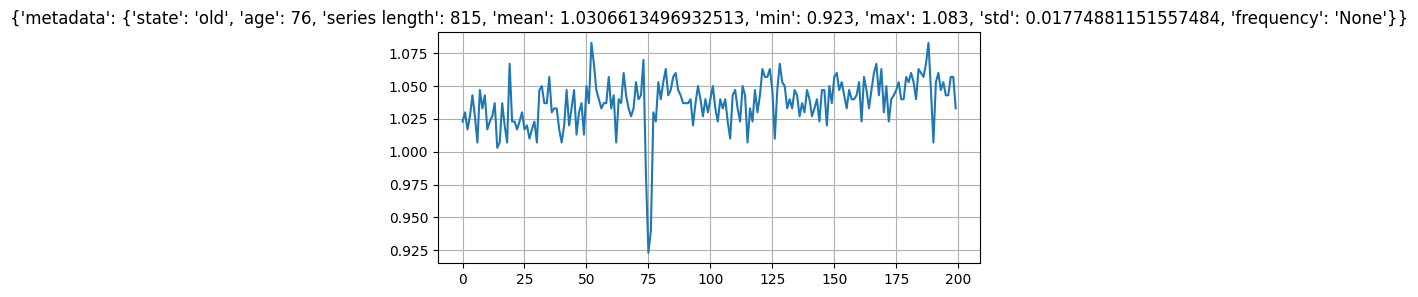

total series length: 815


In [ ]:
plot_1d(id=10, data_dict=gait_data, column="stride interval (s)", max_len=200)

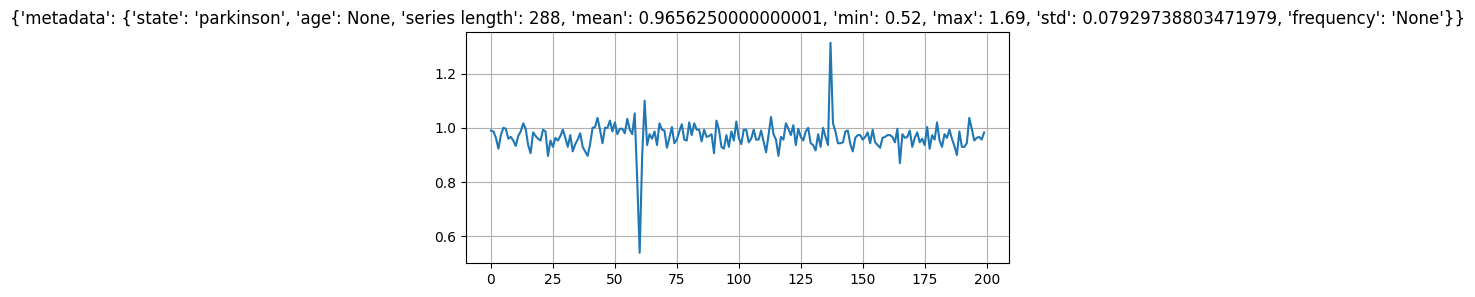

total series length: 288


In [ ]:
plot_1d(id=3, data_dict=gait_data, column="stride interval (s)", max_len=200)

## Heart Rate Oscillations during Meditation
https://physionet.org/content/meditation/1.0.0/data/#files-panel

Heart rate time series for 5 different groups of healthy subjects can be found in text form in the subdirectories of this one:

 - **chi** (C): Chi meditation group. There are two time series for each of the eight subjects (C1, C2, ... C8), denoted by record names with the suffix pre for the pre-meditation period and med for the meditation period. Each series is about one hour in duration.

 - **yoga** (Y): Kundalini Yoga meditation group. As for the Chi group, there are pre and med series for each of the four subjects (Y1, Y2, Y3, Y4). Durations range from 17 to 47 minutes.

 - **normal** (N): Spontaneous breathing group (N1, N2, ... N11). Volunteers were recorded while sleeping. Durations are 6 hours each, except for N3 (4.6 hours).

 - **metron** (M): Metronomic breathing group (M1, M2, ... M14). Volunteers were recorded while supine and breathing at a fixed rate of 0.25 Hz for 10 minutes.

 - **ironman** (I): Elite athletes (I1, I2, ... I9). Subjects participated in the Ironman Triathlon; the recordings were obtained during sleeping hours before the event. Durations range from 1 to 1.7 hours.

In [ ]:
hr_path = datasets_path + '/Heart Rate Oscillations during Meditation'
char_to_group = {'C': 'chi', 'Y': 'yoga', 'N': 'normal', 'M': 'metron', 'I': 'ironman'}
hr_data = {}

for group in os.listdir(hr_path):
  if os.path.isdir(os.path.join(hr_path, group)): # if is a folder
    for filename in os.listdir(os.path.join(hr_path, group)):
      stuff = filename.split(".")

      if len(stuff) == 3:
        id = stuff[0] + "." + stuff[1]
      else:
        id = stuff[0]

      hr_data[id] = {}
      hr_data[id]["data"] = pd.read_csv(os.path.join(hr_path, group, filename), sep='\s+', header=None, names=["time (s)", "heart rate"])

      hr_data[id]["metadata"] = {}
      hr_data[id]["metadata"]["group"] = char_to_group[filename[0]]
      hr_data[id]["metadata"]["series length"] = len(hr_data[id]['data'])
      hr_data[id]["metadata"]["mean"] = hr_data[id]['data']["heart rate"].mean()
      hr_data[id]["metadata"]["min"] = hr_data[id]['data']["heart rate"].min()
      hr_data[id]["metadata"]["max"] = hr_data[id]['data']["heart rate"].max()
      hr_data[id]["metadata"]["std"] = hr_data[id]['data']["heart rate"].std()

      #hr_data[id]["metadata"]["frequency"] = "second" #it's not second, these values are measured between non-uniform intervals

      print(f"File: {filename}, Length: {len(hr_data[id]['data'])}")

File: Y2.med.txt, Length: 1127
File: Y3.pre.txt, Length: 720
File: Y1.pre.txt, Length: 562
File: Y4.pre.txt, Length: 444
File: Y1.med.txt, Length: 1022
File: Y2.pre.txt, Length: 733
File: Y3.med.txt, Length: 910
File: Y4.med.txt, Length: 940
File: I5.txt, Length: 4200
File: I3.txt, Length: 4200
File: I1.txt, Length: 4200
File: I2.txt, Length: 4200
File: I4.txt, Length: 4200
File: I7.txt, Length: 4200
File: I6.txt, Length: 4200
File: I9.txt, Length: 4200
File: I8.txt, Length: 4200
File: M6.txt, Length: 615
File: M5.txt, Length: 527
File: M8.txt, Length: 770
File: M7.txt, Length: 469
File: M1.txt, Length: 744
File: M3.txt, Length: 505
File: M2.txt, Length: 663
File: M4.txt, Length: 585
File: M12.txt, Length: 700
File: M10.txt, Length: 662
File: M13.txt, Length: 571
File: M14.txt, Length: 629
File: M9.txt, Length: 637
File: M11.txt, Length: 665
File: N1.txt, Length: 21322
File: N2.txt, Length: 21637
File: N3.txt, Length: 17008
File: N4.txt, Length: 24975
File: N5.txt, Length: 16859
File: 

In [ ]:
hr_data.keys()

dict_keys(['Y2.med', 'Y3.pre', 'Y1.pre', 'Y4.pre', 'Y1.med', 'Y2.pre', 'Y3.med', 'Y4.med', 'I5', 'I3', 'I1', 'I2', 'I4', 'I7', 'I6', 'I9', 'I8', 'M6', 'M5', 'M8', 'M7', 'M1', 'M3', 'M2', 'M4', 'M12', 'M10', 'M13', 'M14', 'M9', 'M11', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11', 'C2.med', 'C1.pre', 'C1.med', 'C2.pre', 'C4.pre', 'C4.med', 'C3.pre', 'C3.med', 'C6.pre', 'C5.pre', 'C6.med', 'C5.med', 'C8.pre', 'C7.pre', 'C8.med', 'C7.med'])

In [ ]:
hr_data['M4']['data'].head(2)

,time (s),heart rate
0,1.492,63.5593
1,2.436,62.5000


In [ ]:
hr_data['M4']['metadata']

{'group': 'metron',
 'series length': 585,
 'mean': 59.041660512820506,
 'min': 48.0769,
 'max': 77.7202,
 'std': 4.932833997648059}

In [ ]:
#plot_1d(id='M4', data_dict=hr_data, column="heart rate", max_len=200)

In [ ]:
#plot_1d(id='C5.pre', data_dict=hr_data, column="heart rate", max_len=200)

In [ ]:
#plot_1d(id='C5.med', data_dict=hr_data, column="heart rate", max_len=200)

## Time Series Air Quality Data of India (2010-2023)
https://www.kaggle.com/datasets/abhisheksjha/time-series-air-quality-data-of-india-2010-2023?resource=download

 - The dataset contains air quality data for Indian cities from the year 2010 to 2023.
 - It provides information about the air quality conditions in 453 cities across India.
 - The file "stations_info.csv" provides information about various stations.

In [ ]:
info_df = pd.read_csv(datasets_path + '/Time Series Air Quality Data of India/stations_info.csv')
info_df.rename(columns={'file_name': 'station id'}, inplace=True)
info_df.head(2)

,station id,state,city,agency,station_location,start_month,start_month_num,start_year
0,AP001,Andhra Pradesh,Tirupati,APPCB,"Tirumala, Tirupati",July,7,2016
1,AP002,Andhra Pradesh,Vijayawada,APPCB,"PWD Grounds, Vijayawada",May,5,2017


In [ ]:
def df_to_dict(df):
  """Converts a Pandas DataFrame to a dictionary.

  Args:
    df: The input DataFrame.

  Returns:
    A dictionary where keys are column names and values are lists of column values.
  """
  result = {}
  for col in df.columns:
    result[col] = df[col].tolist()
  return result

In [ ]:
aq_path = datasets_path + '/Time Series Air Quality Data of India'
aq_data = {}

count = 0

for filename in os.listdir(aq_path):
  if filename == "stations_info.csv":
    continue
  id = filename.split(".")[0]
  metadata_dict = info_df[info_df["station id"] == id].to_dict('records')[0]

  df = pd.read_csv(os.path.join(aq_path, filename))
  numeric_data_dict = df_to_dict(df)

  aq_data[id] = {}
  aq_data[id]["metadata"] = metadata_dict
  aq_data[id].update(numeric_data_dict)
  aq_data[id]["metadata"]["series length"] = len(df)
  aq_data[id]["metadata"]["starting time"] = df["From Date"]
  aq_data[id]["metadata"]["end time"] = df.tail(1)["To Date"].values[0]
  del aq_data[id]['From Date']
  del aq_data[id]['To Date']

  aq_data[id]["metadata"]["mean"] = {}
  aq_data[id]["metadata"]["min"] = {}
  aq_data[id]["metadata"]["max"] = {}
  aq_data[id]["metadata"]["std"] = {}

  for col in numeric_data_dict:
    if col != "From Date" and col != "To Date":
      aq_data[id]["metadata"]["mean"][col] = df[col].mean()
      aq_data[id]["metadata"]["min"][col] = df[col].min()
      aq_data[id]["metadata"]["max"][col] = df[col].max()
      aq_data[id]["metadata"]["std"][col] = df[col].std()
      aq_data[id]["metadata"]['nans'] = df[col].isna().sum()

  aq_data[id]["metadata"]['frequency'] = "hour"

  print(f"File: {filename}, Length: {len(df)}")
  count += 1
  if count == 10:
    break

File: AP002.csv, Length: 51864
File: AP001.csv, Length: 59150
File: AP003.csv, Length: 50400
File: AP004.csv, Length: 48802
File: AS001.csv, Length: 35808
File: AP008.csv, Length: 3280
File: AP007.csv, Length: 3127
File: AR001.csv, Length: 17655
File: AP009.csv, Length: 1689
File: AP006.csv, Length: 5432


In [ ]:
print(aq_data['AP008'].keys())

dict_keys(['metadata', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'Eth-Benzene (ug/m3)', 'MP-Xylene (ug/m3)', 'O Xylene (ug/m3)', 'RH (%)', 'WS (m/s)', 'WD (degree)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)', 'RF (mm)', 'AT (degree C)'])


In [ ]:
print(aq_data['AP008']['metadata']["starting time"])

0       2022-11-15 08:00:00
1       2022-11-15 09:00:00
2       2022-11-15 10:00:00
3       2022-11-15 11:00:00
4       2022-11-15 12:00:00
               ...         
3275    2023-03-31 19:00:00
3276    2023-03-31 20:00:00
3277    2023-03-31 21:00:00
3278    2023-03-31 22:00:00
3279    2023-03-31 23:00:00
Name: From Date, Length: 3280, dtype: object


In [ ]:
print(aq_data['AP008']["metadata"]['mean'])

{'PM2.5 (ug/m3)': 29.078798254447797, 'PM10 (ug/m3)': 59.25763954761036, 'NO (ug/m3)': 7.219859451862262, 'NO2 (ug/m3)': 59.32052393272962, 'NOx (ppb)': 37.66286776592305, 'NH3 (ug/m3)': 12.0589030261348, 'SO2 (ug/m3)': 4.573423739629866, 'CO (mg/m3)': 0.5706996148908858, 'Ozone (ug/m3)': 27.81389814221653, 'Benzene (ug/m3)': 0.18837147595356551, 'Toluene (ug/m3)': 2.129820895522388, 'Eth-Benzene (ug/m3)': 0.5280565723793677, 'MP-Xylene (ug/m3)': 0.5212079866888519, 'O Xylene (ug/m3)': 0.4599534109816971, 'RH (%)': 65.89834130781499, 'WS (m/s)': 0.2647464114832536, 'WD (degree)': 125.07835087719299, 'SR (W/mt2)': 195.915223119422, 'BP (mmHg)': 807.1521180223284, 'VWS (m/s)': -1.3665901116427432, 'RF (mm)': 0.0, 'AT (degree C)': 24.554730462519938}


In [ ]:
print(aq_data['AP008']["AT (degree C)"])

[24.06, 25.14, 26.32, 26.89, 27.31, 27.19, 27.5, 27.28, 26.68, 25.89, 25.0, 24.47, 24.19, 24.08, 23.79, 23.29, 22.84, 22.36, 22.16, 22.08, 21.74, 21.75, 21.77, 22.24, 23.36, 25.49, 26.37, 27.28, 27.65, 27.9, 27.73, 27.3, 26.63, 26.13, 25.44, 24.8, 24.12, 23.79, 23.62, 23.04, 22.12, 21.77, 21.41, 21.0, 20.76, 20.41, 20.07, 20.7, 23.07, 25.06, 26.48, 27.06, 27.48, 27.84, 27.96, 27.48, 26.5, 25.71, 24.99, 24.05, 23.46, 22.8, 21.93, 21.27, 20.95, 20.54, 20.23, 20.03, 19.87, 19.85, 19.8, 20.37, 21.48, 25.23, 26.54, 26.62, 26.11, 26.76, 26.65, 26.32, 25.85, 25.08, 24.3, 23.61, 23.24, 23.49, 22.04, 21.37, 20.93, 20.71, 20.65, 20.53, 20.36, 20.18, 20.06, 20.95, 23.41, 25.43, 26.09, 27.18, 27.25, 27.19, 26.79, 26.49, 25.92, 25.03, 24.1, 23.1, 22.76, 22.62, 21.81, 21.23, 20.99, 20.74, 20.48, 20.17, 19.84, 19.94, 19.99, 20.73, 22.82, 24.7, 25.9, 26.73, 26.6, 26.29, 26.0, 26.23, 25.77, 24.64, 23.84, 23.45, 22.66, 22.3, 22.18, 22.16, 22.3, 22.27, 22.3, 20.44, 19.94, 20.0, 20.27, 20.83, 21.59, 22.77

In [ ]:
def plot_line_chart(X_data, Y_data=None, title=None, max_len=None):
  plt.figure(figsize=(10, 3))
  if Y_data is not None:
    plt.plot(X_data[:max_len], Y_data[:max_len])
  else:
    plt.plot(X_data[:max_len])
  plt.xlabel("Hours")
  plt.ylabel("Value")
  plt.title(title)
  plt.grid(True)
  plt.show()

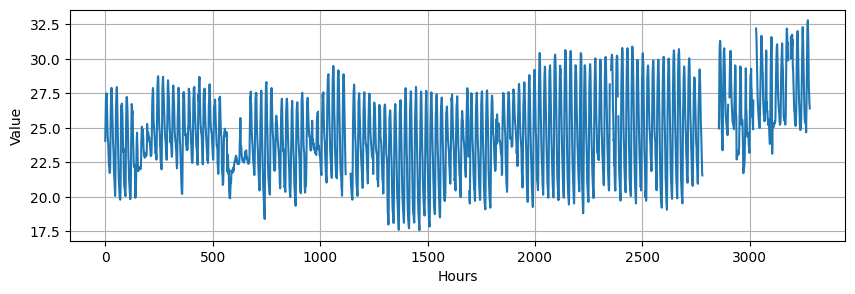

In [ ]:
str_dates = aq_data['AP008']["metadata"]["starting time"]
dates = [pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S') for date_str in str_dates]

plot_line_chart(X_data=aq_data['AP008']["AT (degree C)"], title="", max_len=5000)

## Population Collapse Time Series Data of the World
https://www.kaggle.com/datasets/saadaziz1985/population-collapse?select=total_population.csv

In [ ]:
info_df = pd.read_csv(datasets_path + '/Population Collapse Time Series Data of the World/country_groups_all.csv')
info_df.head(10)

,id,Country,Group,Group Type,iso2Code,capitalCity,longitude,latitude
0,AFG,Afghanistan,South Asia,Region,AF,Kabul,69.1761,34.5228
1,AFG,Afghanistan,Low & Middle Income,By Income,AF,Kabul,69.1761,34.5228
2,AFG,Afghanistan,Low Income,By Income,AF,Kabul,69.1761,34.5228
3,AFG,Afghanistan,Ida Only,By Lending,AF,Kabul,69.1761,34.5228
4,AFG,Afghanistan,Fragile And Conflict Affected Situations,Other Country Groups,AF,Kabul,69.1761,34.5228
5,AFG,Afghanistan,Heavily Indebted Poor Countries (Hipc),Other Country Groups,AF,Kabul,69.1761,34.5228
6,AFG,Afghanistan,Least Developed Countries: Un Classification,Other Country Groups,AF,Kabul,69.1761,34.5228
7,AFG,Afghanistan,World,Other Country Groups,AF,Kabul,69.1761,34.5228
8,AFG,Afghanistan,Pre-Demographic Dividend,Demographic Dividend Groups,AF,Kabul,69.1761,34.5228
9,AFG,Afghanistan,Ida & Ibrd Total,By Lending,AF,Kabul,69.1761,34.5228


In [ ]:
def df_to_dict(df):
    result = {}

    for _, row in df.iterrows():
        country_id = row.iloc[0]
        country_name = row.iloc[1]
        group = row.iloc[2]
        group_type = row.iloc[3]
        capital = row.iloc[5]
        longitude = row.iloc[6]
        latitude = row.iloc[7]

        if country_id not in result:
            result[country_id] = {}

        result[country_id]["country name"] = country_name
        result[country_id]["capital city"] = capital
        result[country_id]["longitude"] = longitude
        result[country_id]["latitude"] = latitude

        if group_type not in result[country_id]:
            result[country_id][group_type] = []
        if group != "World": # exclude this group because it's the same for all countries
          result[country_id][group_type].append(group)

    return result

In [ ]:
country_info_dict = df_to_dict(info_df)

country_info_dict['AFG']

{'country name': 'Afghanistan',
 'capital city': 'Kabul',
 'longitude': 69.1761,
 'latitude': 34.5228,
 'Region': ['South Asia'],
 'By Income': ['Low & Middle Income', 'Low Income'],
 'By Lending': ['Ida Only',
  'Ida & Ibrd Total',
  'South Asia (Ida & Ibrd)',
  'Ida total'],
 'Other Country Groups': ['Fragile And Conflict Affected Situations',
  'Heavily Indebted Poor Countries (Hipc)',
  'Least Developed Countries: Un Classification'],
 'Demographic Dividend Groups': ['Pre-Demographic Dividend']}

In [ ]:
birth_rate_path = datasets_path + "/Population Collapse Time Series Data of the World/total_birth_rate.csv"
death_rate_path = datasets_path + "/Population Collapse Time Series Data of the World/total_death_rate.csv"
median_age_path = datasets_path + "/Population Collapse Time Series Data of the World/total_median_age.csv"
# there are more datasets beyond these

birth_rate_df = pd.read_csv(birth_rate_path)
death_rate_df = pd.read_csv(death_rate_path)
median_age_df = pd.read_csv(median_age_path)

In [ ]:
def df_rows_to_ts(df, attribute, demo_dict): # iterates through df rows and adds the ts to the dict, matching the country IDs
  for _, row in df.iterrows():
    country_id = row.iloc[0]
    if country_id in demo_dict:
      demo_dict[country_id][attribute] = row.iloc[1:].tolist()

In [ ]:
demo_dict = {}
for country_id in country_info_dict:
  demo_dict[country_id] = {}
  demo_dict[country_id]["metadata"] = country_info_dict[country_id].copy()
  df_rows_to_ts(birth_rate_df, attribute="birth rate", demo_dict=demo_dict)
  df_rows_to_ts(death_rate_df, attribute="death rate", demo_dict=demo_dict)
  df_rows_to_ts(median_age_df, attribute="median age", demo_dict=demo_dict)


  demo_dict[country_id]["metadata"]['series length'] = len(demo_dict[country_id]["birth rate"])
  demo_dict[country_id]["metadata"]['start year of the series'] = 2000 # all ts start from year 2000

  demo_dict[country_id]["metadata"]['mean'] = {}
  demo_dict[country_id]["metadata"]['min'] = {}
  demo_dict[country_id]["metadata"]['max'] = {}
  demo_dict[country_id]["metadata"]['std'] = {}

  for attr in demo_dict[country_id]:
    if attr != "metadata":
      demo_dict[country_id]["metadata"]['mean'][attr] = np.mean(demo_dict[country_id][attr])
      demo_dict[country_id]["metadata"]['min'][attr] = np.min(demo_dict[country_id][attr])
      demo_dict[country_id]["metadata"]['max'][attr] = np.max(demo_dict[country_id][attr])
      demo_dict[country_id]["metadata"]['std'][attr] = np.std(demo_dict[country_id][attr])

  demo_dict[country_id]["metadata"]['frequency'] = "year"

In [ ]:
demo_dict["ITA"]['metadata']

{'country name': 'Italy',
 'capital city': 'Rome',
 'longitude': 12.4823,
 'latitude': 41.8955,
 'Region': ['Europe & Central Asia'],
 'By Income': ['High Income'],
 'Other Country Groups': ['Euro Area', 'European Union', 'Oecd Members'],
 'Demographic Dividend Groups': ['Post-Demographic Dividend'],
 'series length': 22,
 'start year of the series': 2000,
 'mean': {'birth rate': 8.713636363636365,
  'death rate': 10.231818181818182,
  'median age': 42.82272727272727},
 'min': {'birth rate': 6.8, 'death rate': 9.5, 'median age': 39.2},
 'max': {'birth rate': 9.8, 'death rate': 12.5, 'median age': 46.8},
 'std': {'birth rate': 1.0415440699206044,
  'death rate': 0.7257512494188747,
  'median age': 2.2871045248169164},
 'frequency': 'year'}

In [ ]:
demo_dict["ITA"].keys()

dict_keys(['metadata', 'birth rate', 'death rate', 'median age'])

## Crime Data from 2020 to Present
https://catalog.data.gov/dataset/crime-data-from-2020-to-present

https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data

This data contains cases of crime, it doesn't have time series structure. We can do some groupby on the date to create time-series-like data.

In [ ]:
df = pd.read_csv(datasets_path + '/US Gov/Crime_Data_from_2020_to_Present.csv')
df.head(1)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506


In [ ]:
grouped_df = df.groupby(['AREA NAME', 'DATE OCC']).size().reset_index(name='counts')

grouped_df = grouped_df.sort_values(by='DATE OCC')
grouped_df.head()

,AREA NAME,DATE OCC,counts
0,77th Street,01/01/2020 12:00:00 AM,85
16465,Newton,01/01/2020 12:00:00 AM,62
23781,Rampart,01/01/2020 12:00:00 AM,70
14637,N Hollywood,01/01/2020 12:00:00 AM,58
10985,Hollywood,01/01/2020 12:00:00 AM,66


In [ ]:
crime_dict = {}
towns = grouped_df['AREA NAME'].unique()

for town in towns:
  crime_dict[town] = {}

  town_df = grouped_df[grouped_df['AREA NAME'] == town]
  town_df['DATE OCC'] = pd.to_datetime(town_df['DATE OCC'])
  town_df = town_df.sort_values(by="DATE OCC").reset_index(drop=True)

  crime_dict[town]['data'] = town_df['counts'].to_list()
  crime_dict[town]['metadata'] = {'town': town}
  crime_dict[town]['metadata']['series length'] = len(town_df)
  crime_dict[town]['metadata']['start date'] = str(town_df['DATE OCC'].min())
  crime_dict[town]['metadata']['end date'] = str(town_df['DATE OCC'].max())
  crime_dict[town]['metadata']['mean'] = town_df['counts'].mean()
  crime_dict[town]['metadata']['min'] = town_df['counts'].min()
  crime_dict[town]['metadata']['max'] = town_df['counts'].max()
  crime_dict[town]['metadata']['std'] = town_df['counts'].std()

  crime_dict[town]['metadata']['sampling frequency'] = "daily"

<ipython-input-29-64433e268dd2>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  town_df['DATE OCC'] = pd.to_datetime(town_df['DATE OCC'])
<ipython-input-29-64433e268dd2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  town_df['DATE OCC'] = pd.to_datetime(town_df['DATE OCC'])
<ipython-input-29-64433e268dd2>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  town_df['DATE OCC'] = pd.to_datetime(town_df['DATE OCC'])
<ipython-input-29-64433e268dd2>:8: SettingWithCopyWarning: 

In [ ]:
crime_dict.keys()

dict_keys(['77th Street', 'Newton', 'Rampart', 'N Hollywood', 'Hollywood', 'Southwest', 'Hollenbeck', 'Topanga', 'Foothill', 'West LA', 'Harbor', 'Van Nuys', 'Olympic', 'Northeast', 'Central', 'Wilshire', 'Pacific', 'Devonshire', 'West Valley', 'Mission', 'Southeast'])

In [ ]:
crime_dict['Southwest']['metadata']

{'town': 'Southwest',
 'series length': 1846,
 'start date': '2020-01-01 00:00:00',
 'end date': '2025-02-08 00:00:00',
 'mean': 35.63001083423619,
 'min': 1,
 'max': 114,
 'std': 14.272233117387902,
 'frequency': 'day'}

## Border Crossing Entry Data
https://catalog.data.gov/dataset/border-crossing-entry-data-683ae

https://www.bts.gov/explore-topics-and-geography/geography/border-crossingentry-data

Again, we need to perform some operations to convert the data into  time series.

In [ ]:
df = pd.read_csv(datasets_path + '/US Gov/Border_Crossing_Entry_Data.csv')
df.tail(5)

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
397904,Opheim,Montana,3317,US-Canada Border,Dec 2024,Personal Vehicles,153,49.000,-106.378,POINT (-106.377583 48.999527)
397905,Lukeville,Arizona,2602,US-Mexico Border,Dec 2024,Truck Containers Loaded,69,31.880,-112.817,POINT (-112.817077 31.880195)
397906,Van Buren,Maine,108,US-Canada Border,Dec 2024,Train Passengers,115,47.160,-67.931,POINT (-67.930799 47.159645)
397907,Ferry,Washington,3013,US-Canada Border,Dec 2024,Trucks,4,49.000,-118.761,POINT (-118.761166 49.000083)
397908,Calexico,California,2503,US-Mexico Border,Dec 2024,Personal Vehicles,489088,32.673,-115.388,POINT (-115.388018 32.673389)


In [ ]:
port_names = list(df['Port Name'].unique())
port_names.remove("Algonac")
port_names.remove("Cross Border Xpress")
measures = df['Measure'].unique()

crossing_data = {}

for port_name in port_names:
  port_df = df[df['Port Name'] == port_name]
  crossing_data[port_name] = {}
  crossing_data[port_name]['data'] = {}
  for measure in measures:
    measure_df = port_df[port_df['Measure'] == measure].sort_values(by="Date")
    measure_df['Date'] = pd.to_datetime(measure_df['Date'])
    measure_df = measure_df.sort_values(by="Date").reset_index(drop=True)
    crossing_data[port_name]['data'][measure] = measure_df['Value'].to_list()
  crossing_data[port_name]['metadata'] = {'port name': port_name}
  crossing_data[port_name]['metadata']['series length'] = measure_df.size
  crossing_data[port_name]['metadata']['state'] = measure_df['State'].unique()[0]
  crossing_data[port_name]['metadata']['border'] = measure_df['Border'].unique()[0]
  crossing_data[port_name]['metadata']['latitude'] = measure_df['Latitude'].unique()[0]
  crossing_data[port_name]['metadata']['longitude'] = measure_df['Longitude'].unique()[0]
  crossing_data[port_name]['metadata']['start date'] = str(measure_df['Date'].min())
  crossing_data[port_name]['metadata']['end date'] = str(measure_df['Date'].max())
  crossing_data[port_name]['metadata']['mean'] = {}
  crossing_data[port_name]['metadata']['min'] = {}
  crossing_data[port_name]['metadata']['max'] = {}
  crossing_data[port_name]['metadata']['std'] = {}

  for measure in measures:
    crossing_data[port_name]['metadata']['mean'][measure] = np.mean(crossing_data[port_name]['data'][measure])
    crossing_data[port_name]['metadata']['std'][measure] = np.std(crossing_data[port_name]['data'][measure])
    try:
      crossing_data[port_name]['metadata']['min'][measure] = np.min(crossing_data[port_name]['data'][measure])
      crossing_data[port_name]['metadata']['max'][measure] = np.max(crossing_data[port_name]['data'][measure])
    except:
      pass
  crossing_data[port_name]['metadata']['sampling frequency'] = "monthly"

<ipython-input-46-c39ff14cfd99>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  measure_df['Date'] = pd.to_datetime(measure_df['Date'])
<ipython-input-46-c39ff14cfd99>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  measure_df['Date'] = pd.to_datetime(measure_df['Date'])
<ipython-input-46-c39ff14cfd99>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  measure_df['Date'] = pd.to_datetime(measure_df['Date'])
<ipython-input-46-c39ff14cfd99>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is

## --Death rates for suicide, by sex, race, Hispanic origin, and age: United States

https://catalog.data.gov/dataset/death-rates-for-suicide-by-sex-race-hispanic-origin-and-age-united-states-020c1

https://www.cdc.gov/nchs/hus/

In [ ]:
df = pd.read_csv(datasets_path + '/US Gov/Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv')
df.head(1)

,INDICATOR,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Death rates for suicide,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.0,1950,1,All ages,0.0,13.2,NaN


# BetterChatGPT
https://zihaozhou.github.io/BetterChatGPT/

In [ ]:
!pip install requests

import requests
import json

In [ ]:
API_KEY = "NoBed0fRoses"
API_ENDPOINT = "https://backend.zzhou.info/v1/chat/completions"

headers = {
    "Authorization": f"Bearer {API_KEY}",
    "Content-Type": "application/json"
}

data = {
    "model": "GPT-4o-Aug",
    "messages": [
        {"role": "system", "content": "You are a helpful assistant and you have to generate a time series descriptions given the information."},
        {"role": "user", "content": "Please describe this time series: 1, 2, 1, 2, 3, 4, 5, 6, 7, 8"}
        ]
}

response = requests.post(API_ENDPOINT, headers=headers, json=data)

if response.status_code == 200:
    result = response.json()
    print(result["choices"][0]["message"]["content"])
else:
    print("Error:", response.status_code, response.text)


This time series can be described in two parts:

1. **Initial Alternating Pattern**: The first four numbers (1, 2, 1, 2) alternate between 1 and 2.

2. **Increasing Sequence**: Starting from the fifth number, the sequence (3, 4, 5, 6, 7, 8) is an increasing series where each number is one greater than the previous one.

Overall, the series transitions from a short alternating pattern to a straightforward increasing sequence.


In [ ]:
cot = False # whether to use chain of thought reasoning, in such case, we only take the final summary as our desired caption

## Helpers

In [ ]:
def get_response(prompt: str,
                 system_prompt="You are a helpful assistant and you have to generate a time series description given the information.",
                 model="GPT-4o-Aug",
                 temperature=0.45,  # Controls randomness (0 = deterministic, 1 = max randomness)
                 top_p=.95,  # Nucleus sampling (0.0 to 1.0, lower = more focused sampling)
                 top_k=40,  # Filters to the top-k highest probability tokens (if supported)
                 max_tokens=150  # Maximum number of tokens in response
                 ):
    data = {
        "model": model,
        "messages": [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": prompt}
        ],
        "temperature": temperature,
        "top_p": top_p,
        "max_tokens": max_tokens,
    }

    if top_k is not None:  # Some APIs support top_k, but not all
        data["top_k"] = top_k

    response = requests.post(API_ENDPOINT, headers=headers, json=data)

    if response.status_code == 200:
        result = response.json()
        return result["choices"][0]["message"]["content"]
    else:
        print("Error:", response.status_code, response.text)


def rank_responses(responses_list: list) -> list: # takes a list of texts, returns a ranking of the indices
  unified_responses = ""
  for i in range(len(responses_list)):
    unified_responses += str(i+1) + ". " + responses_list[i] + "\n\n"

  request = """The following are descriptions of the same time series.
                Rank them from the best to the worst, according to informativeness, factual accuracy, information redundancy, and the use of external knowledge.
                Answer only with the ranked indices directly and don't say anything more, don't copy the entire descriptions.
            """

  ranked_responses = get_response(request + unified_responses)
  ranked_responses = ranked_responses.split(",")
  ranked_responses = [int(x) for x in ranked_responses]
  return ranked_responses

#rank_responses(["The time series started from 5.2 and dropped to 2.9", "The time series is declining", "The time series describes the daily temperatures of Paris, dropping from 5.2 to 2.9 in 10 days."])


def get_sample(dataset_name: str, series_len: int, start_idx=None): # returns the metadata and the time series
  if dataset_name == "air quality":
    id = random.choice(list(aq_data.keys()))
    measure = random.choice(list(aq_data[id].keys())[1:])
    if start_idx is None:
      start_idx = random.randint(0, len(aq_data[id][measure]) - series_len)
    ts = aq_data[id][measure][start_idx:start_idx+series_len]
    ts = [round(x, 2) for x in ts]

    metadata = aq_data[id]["metadata"].copy()
    metadata_cpy = metadata.copy()

    attributes_to_keep = ['state', 'city', 'station_location','start_month','start_year','mean','std','min','max','starting time']

    for attr in metadata_cpy:
      if attr not in attributes_to_keep:
        del metadata[attr]

    metadata["measure"] = measure
    metadata["mean"] = round(metadata_cpy["mean"][measure], 2)
    metadata["std"] = round(metadata_cpy["std"][measure], 2)
    metadata["min"] = round(metadata_cpy["min"][measure], 2)
    metadata["max"] = round(metadata_cpy["max"][measure], 2)


    metadata["all-time average value until today"] = round(metadata.pop("mean"), 2)
    metadata["all-time standard deviation until today"] = round(metadata.pop("std"), 2)
    metadata["all-time minimum"] = round(metadata.pop("min"), 2)
    metadata["all-time  maximum"] = round(metadata.pop("max"), 2)
    metadata["starting time"] = metadata["starting time"][start_idx]

    metadata['average value in this time series'] = round(np.mean(ts), 2)
    metadata['standard deviation in this time series'] = round(np.std(ts), 2)
    metadata['minimum value in this time series'] = round(min(ts), 2)
    metadata['maximum value in this time series'] = round(max(ts), 2)

    metadata["sampling frequency"] = "hourly"


  elif dataset_name == "crime":
    town = random.choice(list(crime_dict.keys()))
    metadata = crime_dict[town]['metadata'].copy()

    start_idx = random.randint(0, len(crime_dict[town]['data']) - series_len)
    ts = crime_dict[town]['data'][start_idx:start_idx + series_len]
    ts = [round(x, 2) for x in ts]

    metadata["start date"] = crime_dict[town]['metadata']['start date'][:-9]
    date = pd.to_datetime(metadata["start date"])
    start_date = date + pd.DateOffset(days=start_idx)
    end_date = start_date + pd.DateOffset(days=series_len)
    metadata["start date of the series"] =  start_date.strftime('%Y-%m-%d')
    metadata["end date of the series"] =  end_date.strftime('%Y-%m-%d')

    metadata["sampling frequency"] = "daily"
    metadata['series length'] = series_len
    metadata["general mean in the history of this town"] = round(crime_dict[town]['metadata']['mean'], 2)
    metadata["general std in the history of this town"] = round(crime_dict[town]['metadata']['std'], 2)
    metadata["general min in the history of this town"] = round(crime_dict[town]['metadata']['min'], 2)
    metadata["general max in the history of this town"] = round(crime_dict[town]['metadata']['max'], 2)

    metadata["mean of this specific series"] = round(np.mean(ts), 2)
    metadata["standard deviation of this specific series"] = round(np.std(ts), 2)
    metadata["minimum of this series"] = round(min(ts), 2)
    metadata["maximum of this series"] = round(max(ts), 2)

    del metadata['min']
    del metadata['max']
    del metadata['mean']
    del metadata['std']
    del metadata['start date']
    del metadata['end date']
    del metadata['frequency']

  elif dataset_name == "border crossing":
    port = random.choice(list(crossing_data.keys()))
    metadata = {}
    means = random.choice(list(crossing_data[port]['data'].keys()))
    start_idx = random.randint(0, len(crossing_data[port]['data'][means]) - series_len)
    ts = crossing_data[port]['data'][means][start_idx:start_idx + series_len]


    metadata['port'] = port
    metadata['means'] = means

    metadata["state"] = crossing_data[port]['metadata']['state']
    metadata["border"] = crossing_data[port]['metadata']['border']
    metadata["sampling frequency"] = "monthly"
    metadata["start date of the series"] = crossing_data[port]['metadata']['start date'][:-9]
    date = pd.to_datetime(metadata["start date of the series"])
    start_date = date + pd.DateOffset(months=start_idx)
    end_date = start_date + pd.DateOffset(months=series_len)
    metadata["start date of the series"] =  start_date.strftime('%Y-%m-%d')
    metadata["end date of the series"] =  end_date.strftime('%Y-%m-%d')


    metadata["general mean in the history of this port"] = round(crossing_data[port]['metadata']['mean'][means], 2)
    metadata["general standard deviation in the history of this port"] = round(crossing_data[port]['metadata']['std'][means], 2)
    metadata["general min in the history of this port"] = round(crossing_data[port]['metadata']['min'][means], 2)
    metadata["general max in the history of this port"] = round(crossing_data[port]['metadata']['max'][means], 2)

    metadata['mean in this specific series'] = round(np.mean(ts), 2)
    metadata['standard deviation in this specific series'] = round(np.std(ts), 2)
    metadata['minimum in this series'] = round(min(ts), 2)
    metadata['maximum in this series'] = round(max(ts), 2)

  elif dataset_name == "heart rate":
    patient_id = random.choice(list(hr_data.keys()))
    metadata = {}
    start_idx = random.randint(0, len(hr_data[patient_id]['data']) - series_len)
    ts = hr_data[patient_id]['data'][start_idx:start_idx + series_len]['heart rate'].tolist()
    ts = [round(x, 2) for x in ts]


    metadata['general mean of this patient in this situation'] = round(hr_data[patient_id]['metadata']['mean'], 2)
    metadata['general std of this patient in this situation'] = round(hr_data[patient_id]['metadata']['std'], 2)
    metadata['general min of this patient in this situation'] = round(hr_data[patient_id]['metadata']['min'], 2)
    metadata['general max of this patient in this situation'] = round(hr_data[patient_id]['metadata']['max'], 2)
    metadata['mean of this specific series'] = round(np.mean(ts), 2)
    metadata['this std of this specific series'] = round(np.std(ts), 2)
    metadata['this min of this specific series'] = round(min(ts), 2)
    metadata['this max of this specific series'] = round(max(ts), 2)

    if "." in patient_id:
      unpacked_id = patient_id.split(".")
    else:
      unpacked_id = [patient_id]

    if len(unpacked_id) == 1:
      category_letter = unpacked_id[0][0]
      if category_letter == "N":
        metadata['category'] = "normal person"
      elif category_letter == "M":
        metadata['category'] = "metronomic breathing practitioner"
      elif category_letter == "I":
        metadata['category'] = "elite triathlon athlete"
      elif category_letter == "Y":
        metadata['category'] = "yoga practitioner"

    elif len(unpacked_id) == 2:
      category_letter = unpacked_id[0][0]
      if category_letter == "Y":
        metadata['category'] = "yoga meditation practitioner"
      elif category_letter == "C":
        metadata['category'] = "chi meditation practitioner"

      moment = unpacked_id[1]
      if moment == "pre":
        metadata['moment'] = "before meditation"
      elif moment == "med":
        metadata['moment'] = "during meditation"

  elif dataset_name == "demography":
    country_ID = random.choice(list(demo_dict.keys()))
    attribute = random.choice(list(demo_dict[country_ID].keys())[1:])
    metadata = {}

    metadata['country'] = demo_dict[country_ID]['metadata']['country name']
    metadata['attribute'] = attribute
    metadata['category by income'] = demo_dict[country_ID]["metadata"]['By Income']
    metadata['groups'] = demo_dict[country_ID]["metadata"]['Other Country Groups']
    if len(metadata['groups']) == 0: del metadata['groups']
    metadata['starting year'] = demo_dict[country_ID]["metadata"]['start year of the series']
    length = 22
    metadata['sampling frequency'] = "yearly"

    ts = demo_dict[country_ID][metadata['attribute']][:length]
    average_ts = np.mean([demo_dict[country][metadata['attribute']] for country in demo_dict if country != country_ID], axis=0)

    ts = [round(x, 2) for x in ts]
    metadata['global average time series'] = [round(x, 2) for x in average_ts]


    metadata['mean of this specific series'] = round(np.mean(ts), 2)
    metadata['std of this specific series'] = round(np.std(ts), 2)
    metadata['min of this specific series'] = round(min(ts), 2)
    metadata['max of this specific series'] = round(max(ts), 2)

  return metadata, ts

# the following function does not preclude that no sample is duplicated, there's a very slim chance that it occurs
def get_samples(dataset_name, series_len, n) -> list: # returns a list of tuples (metadata, ts) of the specified dataset
  samples = []
  for i in range(n):
    samples.append(get_sample(dataset_name, series_len))
  return samples


def get_request(dataset_name, metadata, ts):
  if dataset_name == "air quality":
    request = f"""Here is a time series about {metadata["sampling frequency"]} {metadata["measure"]} in the Indian city of {metadata['city']}: \n {ts} \n Here is the detailed metadata: \n {str(metadata)}.
          \n Describe this time series by focusing on trends and patterns. Discuss concrete numbers you see.
          For numerical values, ensure consistency with the provided time series. If making percentage comparisons, round to the nearest whole number.
          Use the statistics I provided you for comparing this example to the normalcy.
          Use your broad knowledge of geopolitics, natural events, and economic trends to provide meaningful comparisons.
          Be specific and factual, avoiding broad generalizations.
          Highlight significant spikes, dips, or patterns and explain possible causes based on global or regional factors.
          You don't have to explicitly report the numeric values of general statistics, you just use them for reference.
          Compare the trends in this time series to global or regional norms, explaining whether they are higher, lower, or follow expected seasonal patterns.
          When making comparisons, clearly state whether differences are minor, moderate, or significant.
          Use varied sentence structures and descriptive language to create engaging, natural-sounding text.
          Avoid repetitive phrasing and overused expressions.

          Answer in a single paragraph of four sentences at most, without bullet points or any formatting.

          """
  elif dataset_name == "crime":
    request = f"""Here is a time series about the number of {metadata["frequency"]} crimes {metadata["town"]}, Los Angeles, starting from {metadata["start_date"]}: \n {ts}
          \nThe all-time statistics of {metadata["town"]} until today are: \n Mean: {metadata["general_mean"]} \n Standard Deviation: {metadata["general_std"]} \n Minimum: {metadata["general_min"]} \n Maximum: {metadata["general_max"]}
          \nAnd the statistics for this specific time series are: \n Mean: {metadata["this_mean"]} \n Standard Deviation: {metadata["this_std"]} \n Minimum: {metadata["this_min"]} \n Maximum: {metadata["this_max"]}

         \n Describe this time series by focusing on trends and patterns. Discuss concrete numbers you see.
          For numerical values, ensure consistency with the provided time series. If making percentage comparisons, round to the nearest whole number.
          Use the statistics I provided you for comparing this example to the normalcy.
          Use your broad knowledge of geopolitics, natural events, and economic trends to provide meaningful comparisons.
          Be specific and factual, avoiding broad generalizations.
          Highlight significant spikes, dips, or patterns and explain possible causes based on global or regional factors.
          You don't have to explicitly report the numeric values of general statistics, you just use them for reference.
          Compare the trends in this time series to global or regional norms, explaining whether they are higher, lower, or follow expected seasonal patterns.
          When making comparisons, clearly state whether differences are minor, moderate, or significant.
          Use varied sentence structures and descriptive language to create engaging, natural-sounding text.
          Avoid repetitive phrasing and overused expressions.

          Answer in a single paragraph of four sentences at most, without bullet points or any formatting.

          """

  elif dataset_name == "border crossing":
    request = f"""Here is a time series about the number of {metadata['sampling frequency']} {metadata['means']} crossing the port of {metadata['port']} at the {metadata["border"]} border, starting from {metadata["start date"]}: \n {ts}
          \nThe all-time statistics until today of {metadata['means']} crossing {metadata['port']} are: \n Mean: {metadata["general mean in the history of this port"]} \n Standard Deviation: {metadata["general standard deviation in the history of this port"]} \n Minimum: {metadata["general min in the history of this port"]} \n Maximum: {metadata["general max in the history of this port"]}
          Note that these all-time statistics are computed from then all the way until today. These are not historical, these are all-time.
          \nThe statistics for this specific time series are: \n Mean: {metadata['mean in this specific series']} \n Standard Deviation: {metadata['standard deviation in this specific series']} \n Minimum: {metadata['minimum in this series']} \n Maximum: {metadata['maximum in this series']}

           \n Describe this time series by focusing on trends and patterns. Discuss concrete numbers you see.
          For numerical values, ensure consistency with the provided time series. If making percentage comparisons, round to the nearest whole number.
          Use the statistics I provided you for comparing this example to the normalcy.
          Use your broad knowledge of geopolitics, natural events, and economic trends to provide meaningful comparisons.
          Be specific and factual, avoiding broad generalizations.
          Highlight significant spikes, dips, or patterns and explain possible causes based on global or regional factors.
          You don't have to explicitly report the numeric values of general statistics, you just use them for reference.
          Compare the trends in this time series to global or regional norms, explaining whether they are higher, lower, or follow expected seasonal patterns.
          When making comparisons, clearly state whether differences are minor, moderate, or significant.
          Use varied sentence structures and descriptive language to create engaging, natural-sounding text.
          Avoid repetitive phrasing and overused expressions.

          Answer in a single paragraph of four sentences at most, without bullet points or any formatting.
          """

  elif dataset_name == "heart rate":
    request = f"""Here is a time series about the heart rate of a {metadata["category"]} {metadata["moment"]}, it's measured as instantaneous heart rates across measurements. Here it is: \n {ts}
          \nThe general statistics of this person {metadata["moment"]} are: \n Mean: {metadata['general mean of this patient in this situation']} \n Standard Deviation: {metadata['general std of this patient in this situation']} \n Minimum: {metadata['general min of this patient in this situation']} \n Maximum: {metadata['general max of this patient in this situation']}
          \nThe statistics for this specific time series are: \n Mean: {metadata['mean of this specific series']} \n Standard Deviation: {metadata['this std of this specific series']} \n Minimum: {metadata['this min of this specific series']} \n Maximum: {metadata['this max of this specific series']}

          \n Describe this time series by focusing on trends and patterns. Discuss concrete numbers you see.
          For numerical values, ensure consistency with the provided time series. If making percentage comparisons, round to the nearest whole number.
          Use the statistics I provided you for comparing this example to the normalcy.
          Use your broad knowledge of geopolitics, natural events, and economic trends to provide meaningful comparisons.
          Be specific and factual, avoiding broad generalizations.
          Highlight significant spikes, dips, or patterns and explain possible causes based on global or regional factors.
          You don't have to explicitly report the numeric values of general statistics, you just use them for reference.
          Compare the trends in this time series to global or regional norms, explaining whether they are higher, lower, or follow expected seasonal patterns.
          When making comparisons, clearly state whether differences are minor, moderate, or significant.
          Use varied sentence structures and descriptive language to create engaging, natural-sounding text.
          Avoid repetitive phrasing and overused expressions.

          Answer in a single paragraph of four sentences at most, without bullet points or any formatting.
          """

  elif dataset_name == "demography":
    request = f"""I will give you a time series about the {metadata['sampling frequency']} {metadata['attribute']} of {metadata['country']} from {metadata['starting year']}, it's measured as the number of births per 1000 people.
          {metadata['country']} is categorized as a country with these attributes: {metadata['category by income']}.
           Here is the time series: \n {ts}
          \nHere are the statistics for this specific time series for {metadata['country']}: \n Mean: {metadata['mean of this specific series']} \n Standard Deviation: {metadata['std of this specific series']} \n Minimum: {metadata['min of this specific series']} \n Maximum: {metadata['max of this specific series']}
          \nHere is the global average time series for {metadata['attribute']} across all countries: \n {metadata['global average time series']}

          \n Describe this time series by focusing on trends and patterns. Discuss concrete numbers you see.
          For numerical values, ensure consistency with the provided time series. If making percentage comparisons, round to the nearest whole number.
          Use the statistics I provided you for comparing this example to the normalcy.
          Use your broad knowledge of geopolitics, natural events, and economic trends to provide meaningful comparisons.
          Be specific and factual, avoiding broad generalizations.
          Highlight significant spikes, dips, or patterns and explain possible causes based on global or regional factors.
          You don't have to explicitly report the numeric values of general statistics, you just use them for reference.
          Compare the trends in this time series to global or regional norms, explaining whether they are higher, lower, or follow expected seasonal patterns.
          When making comparisons, clearly state whether differences are minor, moderate, or significant.
          Use varied sentence structures and descriptive language to create engaging, natural-sounding text.
          Avoid repetitive phrasing and overused expressions.

          Answer in a single paragraph of four sentences at most, without bullet points or any formatting.
          """
    return request


def augment_request(request, n=3): # rephrases the request prompt n times and returns the augmentations in a list
  augmentation_request = f"""
          Your task is to rephrase the given prompt while preserving all its original information, intent, meta-data, and length.
          - Ensure that the meaning remains unchanged, including instructions related to numerical accuracy, world knowledge, and comparison guidelines.
          - Generate {n} distinct variations, each with a different writing style you can pick from this list:
            1. Formal (precise and professional)
            2. Journalistic (engaging and informative)
            3. Conversational (natural and friendly)
            4. Technical (structured and rigorous)
            5. Creative (slightly varied sentence structure, but factual)

          Here is the original prompt.
          ----------------  \n\n
          {request}
          ----------------  \n\n
          Note that you don't have to answer to the original prompt but just to rephrase it in different ways and write down a singlple concise paragraph, maintain the numeric time series in the prompt.
          Separate each variant with a line without specifying the style. Start with your answer directly without saying anything else.
  """


  variants_response = get_response(augmentation_request, model="GPT-4o-Aug",
                          temperature = 0.7,
                          top_p = 0.85,
                          )


  prompt_variants = variants_response.split("\n\n")
  for variant in prompt_variants:
    if len(variant) < 20: # remove artifacts that are not prompts
      prompt_variants.remove(variant)
  for i in range(len(prompt_variants)): # this request is often ignored in the augmented prompts, so let's add it back
      prompt_variants[i] += "\nAnswer in a single paragraph of four sentences at most, without bullet points or any formatting."

  return prompt_variants

### Pipeline

In [ ]:
metadata, ts = get_sample("demography", 20)
print("Random sampled.")
request = get_request("demography", metadata, ts)
print("Request created.")
augmented_requests = augment_request(request, n=3)
print("Augmentation done.")

responses = []
for i in range(len(augmented_requests)):
  responses.append(get_response(augmented_requests[i], model="GPT-4o-Aug",
                        temperature = 0.75,
                        top_p = 0.85
                  )
  )
  print(f"Done for request variant {i+1}.")

rank = rank_responses(responses)
rank = [x-1 for x in rank]
print("Ranking done.")

for r in rank:
  print(responses[r])

Random sampled.
Request created.
Augmentation done.
Done for request variant 0.
Done for request variant 1.
Done for request variant 2.
Ranking done.
I will present a time series that illustrates Ukraine's yearly death rate from 2000, measured as births per 1,000 people. Ukraine falls into these classifications: ['Low & Middle Income', 'Lower Middle Income', 'Middle Income']. Here is the time series: [15.4, 15.3, 15.7, 16.0, 16.0, 16.6, 16.2, 16.4, 16.3, 15.3, 15.2, 14.5, 14.5, 14.6, 14.7, 14.9, 14.7, 14.5, 14.8, 14.7, 15.9, 18.5]. Here are the statistics for this specific time series for Ukraine: Mean: 15.49, Standard Deviation: 0.94, Minimum: 14.5, Maximum: 18.5. Here is the global average time series for death rate across all countries: [8.62, 8.53, 8.47, 8.4, 8.38, 8.25, 8.14, 8.05, 7.95, 7.85, 7.81, 7.69, 7.66, 7.59, 7.58, 7.57, 7.52, 7.49, 7.48, 7.47, 7.97, 8.51]. Examine this time series by highlighting trends and patterns, and discuss specific numbers you observe. Maintain nume

In [ ]:
print(get_response("Continue this sequence: 1, 4, 9, 16"))

The sequence is composed of perfect squares. Here are the next numbers:

- \(1^2 = 1\)
- \(2^2 = 4\)
- \(3^2 = 9\)
- \(4^2 = 16\)

Continuing this pattern:

- \(5^2 = 25\)
- \(6^2 = 36\)
- \(7^2 = 49\)

So the next numbers in the sequence are 25, 36, and 49.


## Prompting

### Air Quality

In [ ]:
aq_data['AP008']["metadata"].keys()

dict_keys(['station id', 'state', 'city', 'agency', 'station_location', 'start_month', 'start_month_num', 'start_year', 'series length', 'starting time', 'end time', 'mean', 'min', 'max', 'std', 'nans', 'frequency'])

In [ ]:
aq_data['AP008'].keys()

dict_keys(['metadata', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'Eth-Benzene (ug/m3)', 'MP-Xylene (ug/m3)', 'O Xylene (ug/m3)', 'RH (%)', 'WS (m/s)', 'WD (degree)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)', 'RF (mm)', 'AT (degree C)'])

In [ ]:
measure = "PM2.5 (ug/m3)"
id = "AP002"
length = 24*3
ts = aq_data[id][measure][:length]
ts = [round(x, 2) for x in ts]

metadata = aq_data[id]["metadata"].copy()
metadata_cpy = metadata.copy()

attributes_to_keep = ['state', 'city', 'station_location','start_month','start_year','mean','std','min','max','starting time']
for attr in metadata_cpy:
  if attr not in attributes_to_keep:
    del metadata[attr]


metadata["mean"] = round(metadata_cpy["mean"][measure], 2)
metadata["std"] = round(metadata_cpy["std"][measure], 2)
metadata["min"] = round(metadata_cpy["min"][measure], 2)
metadata["max"] = round(metadata_cpy["max"][measure], 2)


metadata["all-time average value until today"] = round(metadata.pop("mean"), 2)
metadata["all-time standard deviation until today"] = round(metadata.pop("std"), 2)
metadata["all-time minimum"] = round(metadata.pop("min"), 2)
metadata["all-time  maximum"] = round(metadata.pop("max"), 2)
metadata["starting time"] = metadata["starting time"].min()

metadata['average value in this time series'] = round(np.mean(ts), 2)
metadata['standard deviation in this time series'] = round(np.std(ts), 2)
metadata['minimum value in this time series'] = round(min(ts), 2)
metadata['maximum value in this time series'] = round(max(ts), 2)

metadata["sampling frequency"] = "hourly"

In [ ]:
metadata

{'state': 'Andhra Pradesh',
 'city': 'Vijayawada',
 'station_location': 'PWD Grounds, Vijayawada ',
 'start_month': 'May',
 'start_year': 2017,
 'starting time': '2017-05-01 00:00:00',
 'all-time average value until today': 34.63,
 'all-time standard deviation until today': 68.73,
 'all-time minimum': 0.03,
 'all-time  maximum': 985.0,
 'average value in this time series': 39.84,
 'standard deviation in this time series': 11.51,
 'minimum value in this time series': 23.16,
 'maximum value in this time series': 73.86}

In [ ]:
prompt = f"""
          Here is a time series about {metadata["sampling frequency"]} {measure} in the Indian city of {metadata['city']}: \n {ts} \n Here is the detailed metadata: \n {str(metadata)}.
          \n Describe this time series by focusing on trends and patterns. Discuss concrete numbers you see.
          For numerical values, ensure consistency with the provided time series. If making percentage comparisons, round to the nearest whole number.
          Use the statistics I provided you for comparing this example to the normalcy.
          Use your broad knowledge of geopolitics, natural events, and economic trends to provide meaningful comparisons.
          Be specific and factual, avoiding broad generalizations.
          Highlight significant spikes, dips, or patterns and explain possible causes based on global or regional factors.
          You don't have to explicitly report the numeric values of general statistics, you just use them for reference.
          Compare the trends in this time series to global or regional norms, explaining whether they are higher, lower, or follow expected seasonal patterns.
          When making comparisons, clearly state whether differences are minor, moderate, or significant.
          Use varied sentence structures and descriptive language to create engaging, natural-sounding text.
          Avoid repetitive phrasing and overused expressions.

          """


if cot:
  prompt += "\nUse chain of thought reasoning and provide step by step reasoning, then give a final summary in a paragraph format."
else:
  prompt += "\nAnswer in a single paragraph of four sentences at most, without bullet points or any formatting."

print(prompt)


          Here is a time series about hourly PM2.5 (ug/m3) in the Indian city of Vijayawada: 
 [45.06, 46.84, 40.97, 39.94, 37.81, 31.05, 33.19, 39.97, 38.78, 31.03, 32.14, 36.78, 29.33, 40.94, 38.94, 37.11, 40.94, 38.94, 36.97, 36.06, 38.55, 57.56, 42.47, 59.07, 61.38, 38.1, 42.23, 50.89, 47.0, 47.35, 60.38, 73.86, 68.73, 58.42, 37.92, 34.84, 28.95, 26.95, 25.0, 24.95, 23.16, 29.05, 30.97, 30.05, 31.92, 29.13, 33.82, 26.88] 
 Here is the detailed metadata: 
 {'state': 'Andhra Pradesh', 'city': 'Vijayawada', 'station_location': 'PWD Grounds, Vijayawada ', 'start_month': 'May', 'start_year': 2017, 'starting time': '2017-05-01 00:00:00', 'all-time average value until today': 34.63, 'all-time standard deviation until today': 68.73, 'all-time minimum': 0.03, 'all-time  maximum': 985.0, 'average value in this time series': 39.84, 'standard deviation in this time series': 11.51, 'minimum value in this time series': 23.16, 'maximum value in this time series': 73.86}.
          
 Describe thi

In [ ]:
n = 3

augmentation_request = f"""
        Your task is to rephrase the given prompt while preserving all its original information, intent, meta-data, and length.
        - Ensure that the meaning remains unchanged, including instructions related to numerical accuracy, world knowledge, and comparison guidelines.
        - Generate {n} distinct variations, each with a different writing style you can pick from this list:
          1. Formal (precise and professional)
          2. Journalistic (engaging and informative)
          3. Conversational (natural and friendly)
          4. Technical (structured and rigorous)
          5. Creative (slightly varied sentence structure, but factual)

        Here is the original prompt.
        ----------------  \n\n
        {prompt}
        ----------------  \n\n
        Note that you don't have to answer to the original prompt but just to rephrase it in different ways and write down a singlple concise paragraph, maintain the numeric time series in the prompt.
        Separate each variant with a line without specifying the style. Start with your answer directly without saying anything else.
"""


variants_response = get_response(augmentation_request, model="GPT-4o-Aug",
                        temperature = 0.7,
                        top_p = 0.85,
                        )


prompt_variants = variants_response.split("\n\n")
for variant in prompt_variants:
  if len(variant) < 20: # remove artifacts that are not prompts
    prompt_variants.remove(variant)
for i in range(len(prompt_variants)): # this request is often ignored in the augmented prompts, so let's add it back
    prompt_variants[i] += "\nAnswer in a single paragraph of four sentences at most, without bullet points or any formatting."

In [ ]:
prompt_variants

['Here is a time series detailing hourly PM2.5 (µg/m³) levels recorded in Vijayawada, India: [45.06, 46.84, 40.97, 39.94, 37.81, 31.05, 33.19, 39.97, 38.78, 31.03, 32.14, 36.78, 29.33, 40.94, 38.94, 37.11, 40.94, 38.94, 36.97, 36.06, 38.55, 57.56, 42.47, 59.07, 61.38, 38.1, 42.23, 50.89, 47.0, 47.35, 60.38, 73.86, 68.73, 58.42, 37.92, 34.84, 28.95, 26.95, 25.0, 24.95, 23.16, 29.05, 30.97, 30.05, 31.92, 29.13, 33.82, 26.88]. Comprehensive metadata includes details such as the location in Andhra Pradesh, specific station site (PWD Grounds, Vijayawada), and the time frame starting May 2017. The all-time average is noted at 34.63 with a standard deviation of 68.73, while the series average is 39.84 with a standard deviation of 11.51, ranging from a minimum of 23.16 to a maximum of 73.86. Discuss the trends and patterns evident in this data, highlighting specific numerical points of interest and comparing them to broader global or regional norms. Use your knowledge to suggest potential caus

In [ ]:
responses = []

for i in range(len(prompt_variants)):
  responses.append(get_response(prompt_variants[i], model="GPT-4o-Aug",
                        temperature = 0.75,
                        top_p = 0.85
                  )
  )
  print(f"Done for {i}")

Done for 0
Done for 1
Done for 2


In [ ]:
responses

['The time series data for PM2.5 levels in Vijayawada shows fluctuations with an average of 39.84 µg/m³, slightly above the all-time location average of 34.63 µg/m³, indicating a moderate elevation in pollution levels. The recorded values range from 23.16 to 73.86 µg/m³, with the peak value significantly exceeding typical safe limits set by global standards like the WHO, which recommends levels below 25 µg/m³ for 24-hour exposure. The higher readings, particularly those reaching 73.86 µg/m³, suggest possible short-term pollution events, possibly due to local industrial activity, vehicular emissions, or meteorological conditions like temperature inversions, which can trap pollutants. Compared globally, these levels are concerning as they surpass many international standards, indicating a need for pollution control measures in the region.',
 'The time series data for PM2.5 levels in Vijayawada shows significant variability, with a notable range from 23.16 to 73.86 µg/m³, indicating fluct

In [ ]:
rank_responses(responses)

[1, 3, 2]

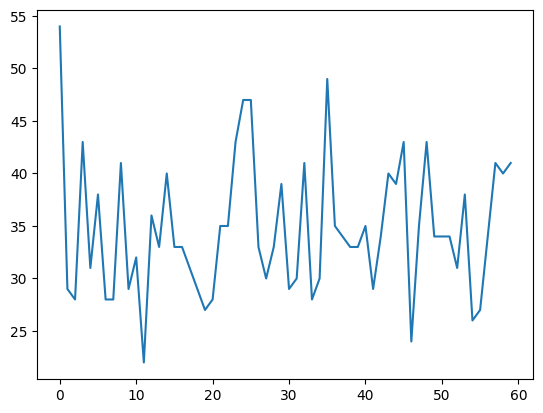

In [ ]:
plt.plot(ts)

### Crime Data

In [ ]:
crime_dict['Southwest']['metadata']

{'town': 'Southwest',
 'series length': 1846,
 'start date': '2020-01-01 00:00:00',
 'end date': '2025-02-08 00:00:00',
 'mean': 35.63001083423619,
 'min': 1,
 'max': 114,
 'std': 14.272233117387902,
 'frequency': 'day'}

In [ ]:
town = "Southwest"
length = 30*2
ts = crime_dict[town]['data'][:length]
ts = [round(x, 2) for x in ts]

metadata["start_date"] = crime_dict[town]['metadata']['start date'][:-9]
metadata["sampling frequency"] = "daily"
metadata["general_mean"] = round(crime_dict[town]['metadata']['mean'], 2)
metadata["general_std"] = round(crime_dict[town]['metadata']['std'], 2)
metadata["general_min"] = round(crime_dict[town]['metadata']['min'], 2)
metadata["general_max"] = round(crime_dict[town]['metadata']['max'], 2)

metadata["this_mean"] = round(np.mean(ts), 2)
metadata["this_std"] = round(np.std(ts), 2)
metadata["this_min"] = round(min(ts), 2)
metadata["this_max"] = round(max(ts), 2)

In [ ]:
prompt = f"""Here is a time series about the number of {metadata["frequency"]} crimes {metadata["town"]}, Los Angeles, starting from {metadata["start_date"]}: \n {ts}
          \nThe all-time statistics of {metadata["town"]} until today are: \n Mean: {metadata["general_mean"]} \n Standard Deviation: {metadata["general_std"]} \n Minimum: {metadata["general_min"]} \n Maximum: {metadata["general_max"]}
          \nAnd the statistics for this specific time series are: \n Mean: {metadata["this_mean"]} \n Standard Deviation: {metadata["this_std"]} \n Minimum: {metadata["this_min"]} \n Maximum: {metadata["this_max"]}

         \n Describe this time series by focusing on trends and patterns. Discuss concrete numbers you see.
          For numerical values, ensure consistency with the provided time series. If making percentage comparisons, round to the nearest whole number.
          Use the statistics I provided you for comparing this example to the normalcy.
          Use your broad knowledge of geopolitics, natural events, and economic trends to provide meaningful comparisons.
          Be specific and factual, avoiding broad generalizations.
          Highlight significant spikes, dips, or patterns and explain possible causes based on global or regional factors.
          You don't have to explicitly report the numeric values of general statistics, you just use them for reference.
          Compare the trends in this time series to global or regional norms, explaining whether they are higher, lower, or follow expected seasonal patterns.
          When making comparisons, clearly state whether differences are minor, moderate, or significant.
          Use varied sentence structures and descriptive language to create engaging, natural-sounding text.
          Avoid repetitive phrasing and overused expressions.

          """


if cot:
  prompt += "\nUse chain of thought reasoning and provide step by step reasoning, then give a final summary in a paragraph format."
else:
  prompt += "\nYou should answer in a paragraph, without bullet points, and use more diverse language"

print(prompt)

Here is a time series about the number of daily crimes Southwest, Los Angeles, starting from 2020-01-01: 
 [54, 29, 28, 43, 31, 38, 28, 28, 41, 29, 32, 22, 36, 33, 40, 33, 33, 31, 29, 27, 28, 35, 35, 43, 47, 47, 33, 30, 33, 39, 29, 30, 41, 28, 30, 49, 35, 34, 33, 33, 35, 29, 34, 40, 39, 43, 24, 35, 43, 34, 34, 34, 31, 38, 26, 27, 34, 41, 40, 41]
          
The all-time statistics of Southwest until today are: 
 Mean: 35.63 
 Standard Deviation: 14.27 
 Minimum: 1 
 Maximum: 114
          
And the statistics for this specific time series are: 
 Mean: 34.65 
 Standard Deviation: 6.39 
 Minimum: 22 
 Maximum: 54

         
 Describe this time series by focusing on trends and patterns. Discuss concrete numbers you see.
          For numerical values, ensure consistency with the provided time series. If making percentage comparisons, round to the nearest whole number.
          Use the statistics I provided you for comparing this example to the normalcy.
          Use your broad knowledge o

In [ ]:
n = 3

augmentation_request = f"""
        Your task is to rephrase the given prompt while preserving all its original information, intent, meta-data, and length.
        - Ensure that the meaning remains unchanged, including instructions related to numerical accuracy, world knowledge, and comparison guidelines.
        - Generate {n} distinct variations, each with a different writing style you can pick from this list:
          1. Formal (precise and professional)
          2. Journalistic (engaging and informative)
          3. Conversational (natural and friendly)
          4. Technical (structured and rigorous)
          5. Creative (slightly varied sentence structure, but factual)

        Here is the original prompt.
        ----------------  \n\n
        {prompt}
        ----------------  \n\n
        Note that you don't have to answer to the original prompt but just to rephrase it in different ways and write down a singlple concise paragraph, maintain the numeric time series in the prompt.
        Separate each variant with a line without specifying the style. Start with your answer directly without saying anything else.
"""


variants_response = get_response(augmentation_request, model="GPT-4o-Aug",
                        temperature = 0.7,
                        top_p = 0.85,
                        )


prompt_variants = variants_response.split("\n\n")
for variant in prompt_variants:
  if len(variant) < 20: # remove artifacts that are not prompts
    prompt_variants.remove(variant)
for i in range(len(prompt_variants)): # this request is often ignored in the augmented prompts, so let's add it back
    prompt_variants[i] += "\nAnswer in a single paragraph of four sentences at most, without bullet points or any formatting."

In [ ]:
prompt_variants

['Here is a time series detailing the number of daily crimes in Southwest, Los Angeles, beginning on January 1, 2020: [54, 29, 28, 43, 31, 38, 28, 28, 41, 29, 32, 22, 36, 33, 40, 33, 33, 31, 29, 27, 28, 35, 35, 43, 47, 47, 33, 30, 33, 39, 29, 30, 41, 28, 30, 49, 35, 34, 33, 33, 35, 29, 34, 40, 39, 43, 24, 35, 43, 34, 34, 34, 31, 38, 26, 27, 34, 41, 40, 41]. The all-time statistics for Southwest up to the present day are as follows: Mean: 35.63, Standard Deviation: 14.27, Minimum: 1, Maximum: 114. The statistics for this specific time series are: Mean: 34.65, Standard Deviation: 6.39, Minimum: 22, Maximum: 54. Analyze this time series by identifying trends and patterns, and discuss specific numbers observed. Ensure that numerical values align with the given time series. When making percentage comparisons, round to the nearest whole number. Use the provided statistics to compare this example to typical patterns. Utilize your extensive knowledge of geopolitics, natural occurrences, and ec

In [ ]:
responses = []

for i in range(n):
  responses.append(get_response(prompt_variants[i], model="GPT-4o-Aug",
                        temperature = 0.75,
                        top_p = 0.85
                  )
  )
  print(f"Done for {i}")

Done for 0
Done for 1
Done for 2


In [ ]:
responses

['The time series of daily crimes in Southwest, Los Angeles, from January 1, 2020, displays a relatively stable pattern with minor fluctuations, as the mean of 34.65 closely mirrors the historical mean of 35.63. The lower standard deviation of 6.39 compared to the historical 14.27 suggests less variability during this period, indicating a more consistent crime rate. The notable decrease from the maximum of 54 to a minimum of 22 may correlate with external factors, possibly influenced by pandemic-related restrictions which globally affected crime rates. Despite these variations, the overall crime figures align moderately with typical seasonal patterns, reflecting a calm yet vigilant period compared to historical extremes.',
 'This time series of daily crimes in Southwest Los Angeles, beginning on January 1, 2020, reveals a generally consistent pattern with a slightly lower average crime rate of 34.65 compared to the all-time mean of 35.63. The maximum value of 54, while significant with

In [ ]:
rank_responses(responses)

[2, 1, 3]

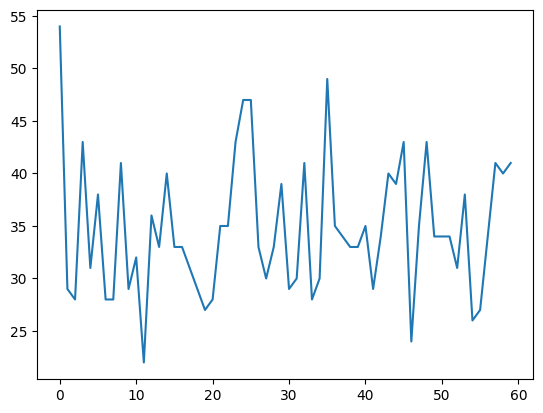

In [ ]:
plt.plot(ts)

### Border Crossing

In [ ]:
crossing_data["Jackman"]['metadata']

{'port name': 'Jackman',
 'series length': 3480,
 'state': 'Maine',
 'border': 'US-Canada Border',
 'latitude': 45.806,
 'longitude': -70.397,
 'start date': '1996-01-01 00:00:00',
 'end date': '2024-12-01 00:00:00',
 'mean': {'Trucks': 7757.816091954023,
  'Buses': 17.914285714285715,
  'Pedestrians': 64.53801169590643,
  'Personal Vehicle Passengers': 26276.597701149425,
  'Personal Vehicles': 13228.040229885057,
  'Bus Passengers': 779.623417721519,
  'Truck Containers Loaded': 3101.2614942528735,
  'Truck Containers Empty': 3381.097701149425,
  'Rail Containers Empty': 1028.882183908046,
  'Trains': 31.433908045977013,
  'Train Passengers': 64.21676300578035,
  'Rail Containers Loaded': 790.8879310344828},
 'min': {'Trucks': 0,
  'Buses': 0,
  'Pedestrians': 0,
  'Personal Vehicle Passengers': 0,
  'Personal Vehicles': 0,
  'Bus Passengers': 0,
  'Truck Containers Loaded': 0,
  'Truck Containers Empty': 0,
  'Rail Containers Empty': 0,
  'Trains': 0,
  'Train Passengers': 0,
  'Rai

In [ ]:
port = "Jackman"
means = "Trucks"

length = 30*2

ts = crossing_data[port]['data'][means][:length]
ts = [round(x, 2) for x in ts]

metadata = crossing_data[port]['metadata'].copy()

metadata['port'] = port
metadata['means'] = means

metadata["state"] = crossing_data[port]['metadata']['state']
metadata["border"] = crossing_data[port]['metadata']['border']
metadata["start date"] = crossing_data[port]['metadata']['start date'][:-9]
metadata["sampling frequency"] = "monthly"


metadata["general mean in the history of this port"] = round(crossing_data[port]['metadata']['mean'][means], 2)
metadata["general standard deviation in the history of this port"] = round(crossing_data[port]['metadata']['std'][means], 2)
metadata["general min in the history of this port"] = round(crossing_data[port]['metadata']['min'][means], 2)
metadata["general max in the history of this port"] = round(crossing_data[port]['metadata']['max'][means], 2)

metadata['mean in this specific series'] = round(np.mean(ts), 2)
metadata['standard deviation in this specific series'] = round(np.std(ts), 2)
metadata['minimum in this series'] = round(min(ts), 2)
metadata['maximum in this series'] = round(max(ts), 2)

metadata["sampling frequency"] = "monthly"

In [ ]:
prompt = f"""Here is a time series about the number of {metadata['sampling frequency']} {metadata['means']} crossing the port of {metadata['port']} at the {metadata["border"]} border, starting from {metadata["start date"]}: \n {ts}
          \nThe all-time statistics until today of {metadata['means']} crossing {metadata['port']} are: \n Mean: {metadata["general mean in the history of this port"]} \n Standard Deviation: {metadata["general standard deviation in the history of this port"]} \n Minimum: {metadata["general min in the history of this port"]} \n Maximum: {metadata["general max in the history of this port"]}
          Note that these all-time statistics are computed from then all the way until today. These are not historical, these are all-time.
          \nThe statistics for this specific time series are: \n Mean: {metadata['mean in this specific series']} \n Standard Deviation: {metadata['standard deviation in this specific series']} \n Minimum: {metadata['minimum in this series']} \n Maximum: {metadata['maximum in this series']}

           \n Describe this time series by focusing on trends and patterns. Discuss concrete numbers you see.
          For numerical values, ensure consistency with the provided time series. If making percentage comparisons, round to the nearest whole number.
          Use the statistics I provided you for comparing this example to the normalcy.
          Use your broad knowledge of geopolitics, natural events, and economic trends to provide meaningful comparisons.
          Be specific and factual, avoiding broad generalizations.
          Highlight significant spikes, dips, or patterns and explain possible causes based on global or regional factors.
          You don't have to explicitly report the numeric values of general statistics, you just use them for reference.
          Compare the trends in this time series to global or regional norms, explaining whether they are higher, lower, or follow expected seasonal patterns.
          When making comparisons, clearly state whether differences are minor, moderate, or significant.
          Use varied sentence structures and descriptive language to create engaging, natural-sounding text.
          Avoid repetitive phrasing and overused expressions.

          """
print(prompt)

Here is a time series about the number of monthly Trucks crossing the port of Jackman at the US-Canada Border border, starting from 1996-01-01: 
 [8877, 9024, 9705, 4328, 5650, 5908, 6100, 9096, 9185, 9679, 9127, 9154, 11456, 11622, 9969, 288, 5761, 6877, 6141, 0, 8742, 8310, 8400, 9260, 9311, 9893, 9202, 6708, 6155, 6636, 6177, 8713, 7804, 8486, 8301, 9139, 9393, 10450, 10466, 6035, 6526, 5105, 7775, 10441, 10958, 9441, 9851, 10548, 11992, 11810, 11608, 7801, 8866, 9717, 9360, 12709, 12052, 11346, 11466, 8981]
          
The all-time statistics until today of Trucks crossing Jackman are: 
 Mean: 7757.82 
 Standard Deviation: 2459.46 
 Minimum: 0 
 Maximum: 22531
          Note that these all-time statistics are computed from then all the way until today. These are not historical, these are all-time.
          
The statistics for this specific time series are: 
 Mean: 8564.68 
 Standard Deviation: 2487.77 
 Minimum: 0 
 Maximum: 12709

           
 Describe this time series by focusing

In [ ]:
n = 3

augmentation_request = f"""
        Your task is to rephrase the given prompt while preserving all its original information, intent, meta-data, and length.
        - Ensure that the meaning remains unchanged, including instructions related to numerical accuracy, world knowledge, and comparison guidelines.
        - Generate {n} distinct variations, each with a different writing style you can pick from this list:
          1. Formal (precise and professional)
          2. Journalistic (engaging and informative)
          3. Conversational (natural and friendly)
          4. Technical (structured and rigorous)
          5. Creative (slightly varied sentence structure, but factual)

        Here is the original prompt.
        ----------------  \n\n
        {prompt}
        ----------------  \n\n
        Note that you don't have to answer to the original prompt but just to rephrase it in different ways and write down a singlple concise paragraph, maintain the numeric time series in the prompt.
        Separate each variant with a line without specifying the style. Start with your answer directly without saying anything else.
"""


variants_response = get_response(augmentation_request, model="GPT-4o-Aug",
                        temperature = 0.7,
                        top_p = 0.85,
                        )


prompt_variants = variants_response.split("\n\n")
for variant in prompt_variants:
  if len(variant) < 20: # remove artifacts that are not prompts
    prompt_variants.remove(variant)
for i in range(len(prompt_variants)): # this request is often ignored in the augmented prompts, so let's add it back
    prompt_variants[i] += "\nAnswer in a single paragraph of four sentences at most, without bullet points or any formatting."

In [ ]:
prompt_variants

["Here is a time series detailing the number of trucks crossing the Jackman port at the US-Canada Border beginning from 1996-01-01: [8877, 9024, 9705, 4328, 5650, 5908, 6100, 9096, 9185, 9679, 9127, 9154, 11456, 11622, 9969, 288, 5761, 6877, 6141, 0, 8742, 8310, 8400, 9260, 9311, 9893, 9202, 6708, 6155, 6636, 6177, 8713, 7804, 8486, 8301, 9139, 9393, 10450, 10466, 6035, 6526, 5105, 7775, 10441, 10958, 9441, 9851, 10548, 11992, 11810, 11608, 7801, 8866, 9717, 9360, 12709, 12052, 11346, 11466, 8981]. The comprehensive statistics for truck crossings at Jackman are: Mean: 7757.82, Standard Deviation: 2459.46, Minimum: 0, Maximum: 22531. Note that these are all-time statistics, not historical, and are calculated up to the present. For this specific time series, the statistics are: Mean: 8564.68, Standard Deviation: 2487.77, Minimum: 0, Maximum: 12709. Analyze this time series by identifying trends and patterns, and discuss specific figures you observe. Ensure consistency with the provided t

In [ ]:
responses = []

for i in range(len(prompt_variants)):
  responses.append(get_response(prompt_variants[i], model="GPT-4o-Aug",
                        temperature = 0.75,
                        top_p = 0.85
                  )
  )
  print(f"Done for {i}")

Done for 0
Done for 1
Done for 2


In [ ]:
responses

["The time series for truck crossings at the Jackman port reveals intriguing fluctuations, with notable peaks at 12,709 and significant troughs, including a zero value. Compared to the overall statistics, the series' mean and standard deviation are somewhat higher, indicating a moderately volatile period. The spikes in crossings could be attributed to economic surges or policy changes affecting trade, while the abrupt drop to zero might suggest temporary closures due to geopolitical tensions or adverse weather events. Compared to typical regional trends, these variations are moderately significant, hinting at external factors influencing cross-border activities distinct from usual seasonal patterns.",
 "The time series data on truck crossings at the Jackman port reveals notable fluctuations, with a mean higher than the all-time average, suggesting a period of increased activity. Peaks, such as the maximum of 12,709, significantly exceed the overall maximum, indicating specific periods 

In [ ]:
rank_responses(responses)

[1, 2, 3]

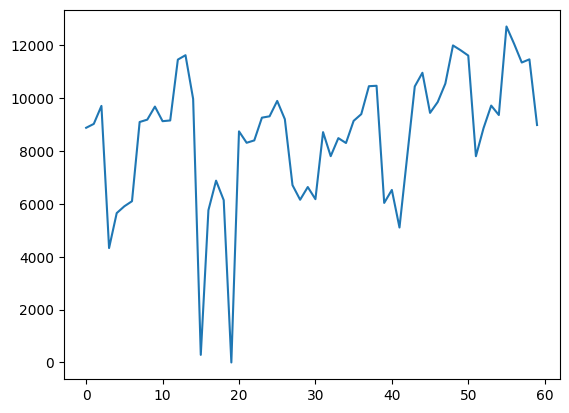

In [ ]:
plt.plot(ts)

### Heart Rate Oscillation

In [ ]:
hr_data.keys()

dict_keys(['Y2.med', 'Y3.pre', 'Y1.pre', 'Y4.pre', 'Y1.med', 'Y2.pre', 'Y3.med', 'Y4.med', 'I5', 'I3', 'I1', 'I2', 'I4', 'I7', 'I6', 'I9', 'I8', 'M6', 'M5', 'M8', 'M7', 'M1', 'M3', 'M2', 'M4', 'M12', 'M10', 'M13', 'M14', 'M9', 'M11', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11', 'C2.med', 'C1.pre', 'C1.med', 'C2.pre', 'C4.pre', 'C4.med', 'C3.pre', 'C3.med', 'C6.pre', 'C5.pre', 'C6.med', 'C5.med', 'C8.pre', 'C7.pre', 'C8.med', 'C7.med'])

In [ ]:
hr_data['Y2.med']['metadata']

{'group': 'yoga',
 'series length': 1127,
 'mean': 99.74054755989353,
 'min': 61.9195,
 'max': 121.951,
 'std': 10.329491401459023}

In [ ]:
patient_id = 'Y2.med'

metadata = {}
metadata["category"] = "yoga meditation practitioner"
metadata["moment"] = "during meditation"

length = 100
ts = hr_data[id]['data'][:length]['heart rate'].tolist()
ts = [round(x, 2) for x in ts]

metadata['general mean of this patient in this situation'] = round(hr_data[patient_id]['metadata']['mean'], 2)
metadata['general std of this patient in this situation'] = round(hr_data[patient_id]['metadata']['std'], 2)
metadata['general min of this patient in this situation'] = round(hr_data[patient_id]['metadata']['min'], 2)
metadata['general max of this patient in this situation'] = round(hr_data[patient_id]['metadata']['max'], 2)
metadata['mean of this specific series'] = round(np.mean(ts), 2)
metadata['this std of this specific series'] = round(np.std(ts), 2)
metadata['this min of this specific series'] = round(min(ts), 2)
metadata['this max of this specific series'] = round(max(ts), 2)

In [ ]:
prompt = f"""Here is a time series about the heart rate of a {metadata["category"]} {metadata["moment"]}, it's measured as instantaneous heart rates across measurements. Here it is: \n {ts}
          \nThe general statistics of this person {metadata["moment"]} are: \n Mean: {metadata['general mean of this patient in this situation']} \n Standard Deviation: {metadata['general std of this patient in this situation']} \n Minimum: {metadata['general min of this patient in this situation']} \n Maximum: {metadata['general max of this patient in this situation']}
          \nThe statistics for this specific time series are: \n Mean: {metadata['mean of this specific series']} \n Standard Deviation: {metadata['this std of this specific series']} \n Minimum: {metadata['this min of this specific series']} \n Maximum: {metadata['this max of this specific series']}

          \n Describe this time series by focusing on trends and patterns. Discuss concrete numbers you see.
          For numerical values, ensure consistency with the provided time series. If making percentage comparisons, round to the nearest whole number.
          Use the statistics I provided you for comparing this example to the normalcy.
          Use your broad knowledge of geopolitics, natural events, and economic trends to provide meaningful comparisons.
          Be specific and factual, avoiding broad generalizations.
          Highlight significant spikes, dips, or patterns and explain possible causes based on global or regional factors.
          You don't have to explicitly report the numeric values of general statistics, you just use them for reference.
          Compare the trends in this time series to global or regional norms, explaining whether they are higher, lower, or follow expected seasonal patterns.
          When making comparisons, clearly state whether differences are minor, moderate, or significant.
          Use varied sentence structures and descriptive language to create engaging, natural-sounding text.
          Avoid repetitive phrasing and overused expressions.

          """

if cot:
  prompt += "\nUse chain of thought reasoning and provide step by step reasoning, then give a final summary in a paragraph format."
else:
  prompt += "\nYou should answer in a paragraph, without bullet points, and use more diverse language"

print(prompt)

Here is a time series about the heart rate of a yoga meditation practitioner during meditation, it's measured as instantaneous heart rates across measurements. Here it is: 
 [102.39, 98.52, 90.36, 87.21, 88.24, 90.36, 88.24, 92.59, 96.0, 97.24, 99.67, 101.01, 103.81, 102.39, 105.26, 98.52, 98.52, 90.36, 88.24, 93.6, 89.29, 96.0, 96.0, 99.67, 101.01, 103.81, 101.01, 102.39, 97.24, 94.79, 89.29, 87.21, 84.39, 64.52, 69.2, 71.77, 80.0, 71.77, 83.45, 93.6, 97.24, 97.24, 102.39, 99.67, 99.67, 98.52, 94.79, 83.45, 84.39, 85.35, 88.24, 90.36, 94.79, 97.24, 101.01, 102.39, 106.76, 108.11, 105.26, 105.26, 99.67, 90.36, 89.29, 90.36, 93.6, 94.79, 96.0, 97.24, 101.01, 98.52, 97.24, 98.52, 92.59, 90.36, 91.46, 92.59, 94.79, 98.52, 101.01, 103.81, 108.11, 106.76, 108.11, 102.39, 92.59, 76.82, 66.82, 61.92, 63.49, 66.82, 71.09, 83.45, 88.24, 94.79, 99.67, 101.01, 105.26, 106.76, 106.76, 106.76]
          
The general statistics of this person during meditation are: 
 Mean: 99.74 
 Standard Deviation

In [ ]:
n = 3

augmentation_request = f"""
        Your task is to rephrase the given prompt while preserving all its original information, intent, meta-data, and length.
        - Ensure that the meaning remains unchanged, including instructions related to numerical accuracy, world knowledge, and comparison guidelines.
        - Generate {n} distinct variations, each with a different writing style you can pick from this list:
          1. Formal (precise and professional)
          2. Journalistic (engaging and informative)
          3. Conversational (natural and friendly)
          4. Technical (structured and rigorous)
          5. Creative (slightly varied sentence structure, but factual)

        Here is the original prompt.
        ----------------  \n\n
        {prompt}
        ----------------  \n\n
        Note that you don't have to answer to the original prompt but just to rephrase it in different ways and write down a singlple concise paragraph, maintain the numeric time series in the prompt.
        Separate each variant with a line without specifying the style. Start with your answer directly without saying anything else.
"""


variants_response = get_response(augmentation_request, model="GPT-4o-Aug",
                        temperature = 0.7,
                        top_p = 0.85,
                        )


prompt_variants = variants_response.split("\n\n")
for variant in prompt_variants:
  if len(variant) < 20: # remove artifacts that are not prompts
    prompt_variants.remove(variant)
for i in range(len(prompt_variants)): # this request is often ignored in the augmented prompts, so let's add it back
    prompt_variants[i] += "\nAnswer in a single paragraph of four sentences at most, without bullet points or any formatting."

In [ ]:
prompt_variants

["Here is a time series representing the heart rate of a yoga practitioner during meditation, recorded as instantaneous heart rates across various measurements. The data is as follows: [102.39, 98.52, 90.36, 87.21, 88.24, 90.36, 88.24, 92.59, 96.0, 97.24, 99.67, 101.01, 103.81, 102.39, 105.26, 98.52, 98.52, 90.36, 88.24, 93.6, 89.29, 96.0, 96.0, 99.67, 101.01, 103.81, 101.01, 102.39, 97.24, 94.79, 89.29, 87.21, 84.39, 64.52, 69.2, 71.77, 80.0, 71.77, 83.45, 93.6, 97.24, 97.24, 102.39, 99.67, 99.67, 98.52, 94.79, 83.45, 84.39, 85.35, 88.24, 90.36, 94.79, 97.24, 101.01, 102.39, 106.76, 108.11, 105.26, 105.26, 99.67, 90.36, 89.29, 90.36, 93.6, 94.79, 96.0, 97.24, 101.01, 98.52, 97.24, 98.52, 92.59, 90.36, 91.46, 92.59, 94.79, 98.52, 101.01, 103.81, 108.11, 106.76, 108.11, 102.39, 92.59, 76.82, 66.82, 61.92, 63.49, 66.82, 71.09, 83.45, 88.24, 94.79, 99.67, 101.01, 105.26, 106.76, 106.76, 106.76]. The general statistics during meditation for this individual are: Mean: 99.74, Standard Deviat

In [ ]:
responses = []

for i in range(len(prompt_variants)):
  responses.append(get_response(prompt_variants[i], model="GPT-4o-Aug",
                        temperature = 0.75,
                        top_p = 0.85
                  )
  )
  print(f"Done for {i}")

Done for 0
Done for 1
Done for 2


In [ ]:
responses

["The heart rate time series of the yoga practitioner during meditation reveals an intriguing pattern of fluctuations, characterized by an initial elevated heart rate, followed by a gradual decline, before experiencing intermittent spikes and dips. Notably, the heart rate peaks at 108.11, which, while below the practitioner's maximum of 121.95, suggests moments of heightened physiological activity possibly linked to deeper meditative states or external stimuli. The mean heart rate of 93.6, slightly lower than the individual's general average, alongside a similar standard deviation, indicates a generally relaxed state with occasional variations, perhaps reflecting the natural oscillations of focus and relaxation typical in meditation. These fluctuations might align with global patterns of stress reduction practices, where heart rate variations serve as a reflection of the dynamic interplay between mind and body, illustrating the profound impacts of meditation in fostering physiological 

In [ ]:
rank_responses(responses)

[2, 3, 1]

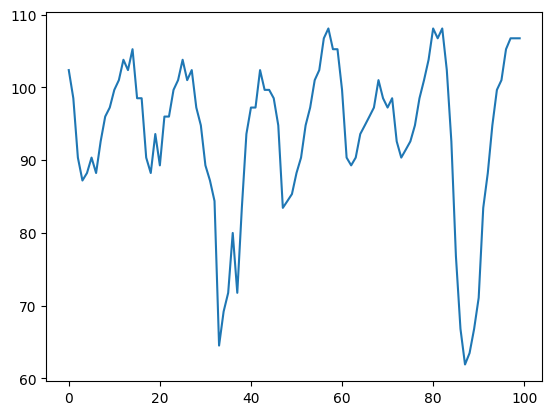

In [ ]:
plt.plot(ts)

### Population Collapse

In [ ]:
demo_dict.keys()

dict_keys(['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CYM', 'CAF', 'TCD', 'CHI', 'CHL', 'CHN', 'COL', 'COM', 'COD', 'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FRO', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'PRK', 'KOR', 'XKX', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'NCL', 'N

In [ ]:
demo_dict["ALB"]['metadata']

{'country name': 'Albania',
 'capital city': 'Tirane',
 'longitude': 19.8172,
 'latitude': 41.3317,
 'Region': ['Europe & Central Asia'],
 'By Income': ['Low & Middle Income', 'Middle Income', 'Upper Middle Income'],
 'By Lending': ['Ibrd Only',
  'Europe & Central Asia (Ida & Ibrd Countries)',
  'Ida & Ibrd Total'],
 'Other Country Groups': ['Europe & Central Asia (Excluding High Income)'],
 'Demographic Dividend Groups': ['Late-Demographic Dividend'],
 'series length': 22,
 'start year of the series': 2000,
 'mean': {'birth rate': 12.476227272727272,
  'death rate': 7.404499999999999,
  'median age': 32.14090909090908},
 'min': {'birth rate': 10.24, 'death rate': 5.798, 'median age': 26.3},
 'max': {'birth rate': 17.076, 'death rate': 11.325, 'median age': 37.3},
 'std': {'birth rate': 1.8333735157755247,
  'death rate': 1.434140501231566,
  'median age': 3.4214110713283574},
 'frequency': 'year'}

In [ ]:
metadata = {}

country_ID = "CHN"
metadata['country'] = demo_dict[country_ID]['metadata']['country name']
metadata['attribute'] = "birth rate"
metadata['category by income'] = demo_dict[country_ID]["metadata"]['By Income']
metadata['groups'] = demo_dict[country_ID]["metadata"]['Other Country Groups']
metadata['starting year'] = demo_dict[country_ID]["metadata"]['start year of the series']
length = 22
metadata['sampling frequency'] = "yearly"

ts = demo_dict[country_ID][metadata['attribute']][:length]
average_ts = np.mean([demo_dict[country][metadata['attribute']] for country in demo_dict if country != country_ID], axis=0)

ts = [round(x, 2) for x in ts]
metadata['global average ts'] = [round(x, 2) for x in average_ts]


metadata['mean of this specific series'] = round(np.mean(ts), 2)
metadata['std of this specific series'] = round(np.std(ts), 2)
metadata['min of this specific series'] = round(min(ts), 2)
metadata['max of this specific series'] = round(max(ts), 2)

In [ ]:
prompt = f"""I will give you a time series about the {metadata['sampling frequency']} {metadata['attribute']} of {metadata['country']} from {metadata['starting year']}, it's measured as the number of births per 1000 people.
          {metadata['country']} is categorized as a country with these attributes: {metadata['category by income']}.
           Here is the time series: \n {ts}
          \nHere are the statistics for this specific time series for {metadata['country']}: \n Mean: {metadata['mean of this specific series']} \n Standard Deviation: {metadata['std of this specific series']} \n Minimum: {metadata['min of this specific series']} \n Maximum: {metadata['max of this specific series']}
          \nHere is the global average time series for {metadata['attribute']} across all countries: \n {metadata['global average ts']}

          \n Describe this time series by focusing on trends and patterns. Discuss concrete numbers you see.
          For numerical values, ensure consistency with the provided time series. If making percentage comparisons, round to the nearest whole number.
          Use the statistics I provided you for comparing this example to the normalcy.
          Use your broad knowledge of geopolitics, natural events, and economic trends to provide meaningful comparisons.
          Be specific and factual, avoiding broad generalizations.
          Highlight significant spikes, dips, or patterns and explain possible causes based on global or regional factors.
          You don't have to explicitly report the numeric values of general statistics, you just use them for reference.
          Compare the trends in this time series to global or regional norms, explaining whether they are higher, lower, or follow expected seasonal patterns.
          When making comparisons, clearly state whether differences are minor, moderate, or significant.
          Use varied sentence structures and descriptive language to create engaging, natural-sounding text.
          Avoid repetitive phrasing and overused expressions.

          """

if cot:
  prompt += "\nUse chain of thought reasoning and provide step by step reasoning, then give a final summary in a paragraph format."
else:
  prompt += "\nYou should answer in a paragraph, without bullet points, and use more diverse language"

print(prompt)

I will give you a time series about the yearly birth rate of China from 2000, it's measured as the number of births per 1000 people.
          China is categorized as a country with these attributes: ['Low & Middle Income', 'Middle Income', 'Upper Middle Income'].
           Here is the time series: 
 [14.03, 13.38, 12.86, 12.41, 12.29, 12.4, 12.09, 12.1, 12.14, 11.95, 11.9, 13.27, 14.57, 13.03, 13.83, 11.99, 13.57, 12.64, 10.86, 10.41, 8.52, 7.52]
          
Here are the statistics for this specific time series for China: 
 Mean: 12.17 
 Standard Deviation: 1.63 
 Minimum: 7.52 
 Maximum: 14.57
          
Here is the global average time series for birth rate across all countries: 
 [23.6, 23.19, 22.85, 22.59, 22.6, 22.3, 22.25, 22.09, 22.07, 21.92, 21.79, 21.4, 21.25, 20.86, 20.81, 20.31, 19.97, 19.51, 19.17, 18.84, 18.47, 18.18]

          
 Describe this time series by focusing on trends and patterns. Discuss concrete numbers you see.
          For numerical values, ensure consisten

In [ ]:
n = 3

augmentation_request = f"""
        Your task is to rephrase the given prompt while preserving all its original information, intent, meta-data, and length.
        - Ensure that the meaning remains unchanged, including instructions related to numerical accuracy, world knowledge, and comparison guidelines.
        - Generate {n} distinct variations, each with a different writing style you can pick from this list:
          1. Formal (precise and professional)
          2. Journalistic (engaging and informative)
          3. Conversational (natural and friendly)
          4. Technical (structured and rigorous)
          5. Creative (slightly varied sentence structure, but factual)

        Here is the original prompt.
        ----------------  \n\n
        {prompt}
        ----------------  \n\n
        Note that you don't have to answer to the original prompt but just to rephrase it in different ways and write down a singlple concise paragraph, maintain the numeric time series in the prompt.
        Separate each variant with a line without specifying the style. Start with your answer directly without saying anything else.
"""


variants_response = get_response(augmentation_request, model="GPT-4o-Aug",
                        temperature = 0.7,
                        top_p = 0.85,
                        )


prompt_variants = variants_response.split("\n\n")
for variant in prompt_variants:
  if len(variant) < 20: # remove artifacts that are not prompts
    prompt_variants.remove(variant)
for i in range(len(prompt_variants)): # this request is often ignored in the augmented prompts, so let's add it back
    prompt_variants[i] += "\nAnswer in a single paragraph of four sentences at most, without bullet points or any formatting."

In [ ]:
prompt_variants

["I will provide you with a time series detailing China's annual birth rate since 2000, expressed as births per 1,000 people. China falls into the Low & Middle Income category. Here's the series: [14.03, 13.38, 12.86, 12.41, 12.29, 12.4, 12.09, 12.1, 12.14, 11.95, 11.9, 13.27, 14.57, 13.03, 13.83, 11.99, 13.57, 12.64, 10.86, 10.41, 8.52, 7.52]. The statistics for this series are: Mean: 12.17, Standard Deviation: 1.63, Minimum: 7.52, Maximum: 14.57. Meanwhile, the global average birth rate time series is: [23.6, 23.19, 22.85, 22.59, 22.6, 22.3, 22.25, 22.09, 22.07, 21.92, 21.79, 21.4, 21.25, 20.86, 20.81, 20.31, 19.97, 19.51, 19.17, 18.84, 18.47, 18.18]. Analyze this series by identifying trends and patterns, emphasizing specific numbers. Ensure numerical consistency with the series and round percentage comparisons to the nearest whole number. Utilize the provided statistics to compare norms, leveraging your geopolitical, environmental, and economic knowledge for insightful comparisons.

In [ ]:
responses = []

for i in range(len(prompt_variants)):
  responses.append(get_response(prompt_variants[i], model="GPT-4o-Aug",
                        temperature = 0.75,
                        top_p = 0.85
                  )
  )
  print(f"Done for {i}")

Done for 0
Done for 1
Done for 2


In [ ]:
responses

["From 2000 to 2022, China's annual birth rate per 1,000 people shows a fluctuating pattern with notable peaks, such as 14.57 in 2012 and significant declines, reaching a low of 7.52 in 2021. These variations contrast with the global average, which steadily declined from 23.6 to 18.18, highlighting a more moderate decrease. China's birth rate experienced a dramatic drop of 46% from its peak in 2012 to 2021, compared to the global trend, which saw a 23% reduction over the same period. The sharp decline in China's birth rate could be attributed to socioeconomic factors, like the aging population, urbanization, and changing cultural attitudes toward family size, exacerbated by policies such as the one-child policy and its lingering effects even after relaxation.",
 "China's birth rate from 2000 to 2022 shows a generally declining trend, with notable fluctuations like a significant peak in 2012 at 14.57 births per 1,000, potentially influenced by the relaxation of the one-child policy. In 

In [ ]:
rank_responses(responses)

[2, 1, 3]

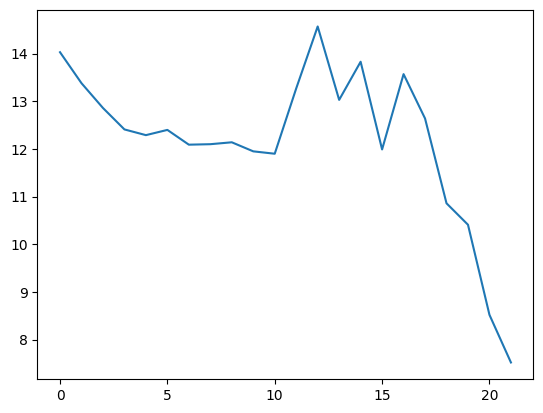

In [ ]:
plt.plot(ts)